In [1288]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1289]:
import pandas as pd
import numpy as np

df = pd.read_csv('property_centre_all.csv')

df.head()
df.shape

(4980, 9)

In [1290]:
df = df.drop_duplicates()
df.shape

(4755, 9)

In [1291]:
df.head()

,Date,Description,Location,Currency,Amount,Period,House_type,Bedrooms,Serviced
0,Last Updated: 28 Oct 2023,Shop for rent,"Lekki Phase 1, Lekki, Lagos",₦,"3,500,000",per annum,Type: Shop,Toilets: 1,None
1,Last Updated: 30 Oct 2023,4 bedroom terraced duplex for rent,"Ajah, Lagos",₦,"3,500,000",per annum,Type: Terraced Duplex,Bedrooms: 4,None
2,Last Updated: 30 Oct 2023,Self contain (single rooms) for rent,"Off Chevron Toll Gate, Orchid Road, Lekki, Lagos",₦,"950,000",per annum,Type: Self Contain (Single Rooms),Bathrooms: 1,Serviced
3,Last Updated: 30 Oct 2023,1 bedroom mini flat (room and parlour) for rent,"Royal Homes Back Of Catholic Church Gra, Abij...",₦,"800,000",per annum,Type: Mini Flat (Room and Parlour),Bedrooms: 1,None
4,Last Updated: 30 Oct 2023,Self contain (single rooms) for rent,"Chevy Veiw Estate Along Chevron Drive Lagos, ...",₦,"1,500,000",per annum,Type: Self Contain (Single Rooms),Bathrooms: 1,Serviced


In [1292]:
df.describe()

,Date,Description,Location,Currency,Amount,Period,House_type,Bedrooms,Serviced
count,4755,4755,4755,4755,4755,4734,4755,4755,4755
unique,29,88,1984,2,222,6,29,85,2
top,Last Updated: 30 Oct 2023,2 bedroom flat / apartment for rent,"Lekki Phase 1, Lekki, Lagos",₦,"3,500,000",per annum,Type: Flat / Apartment,Bedrooms: 3,None
freq,924,848,347,4716,243,4635,1906,1134,3039


In [1293]:
df.isnull().sum()

Date            0
Description     0
Location        0
Currency        0
Amount          0
Period         21
House_type      0
Bedrooms        0
Serviced        0
dtype: int64

## Data Cleaning

In [1294]:
# clean date column
df['Date']
for index, row in df.iterrows():
    date = row['Date'].split(":")
    df.loc[index, 'Date'] = date[1]
    

In [1295]:
df['Date'] = pd.to_datetime(df['Date'])

In [1296]:
df.dtypes

Date           datetime64[ns]
Description            object
Location               object
Currency               object
Amount                 object
Period                 object
House_type             object
Bedrooms               object
Serviced               object
dtype: object

In [1297]:
df.head()

,Date,Description,Location,Currency,Amount,Period,House_type,Bedrooms,Serviced
0,2023-10-28,Shop for rent,"Lekki Phase 1, Lekki, Lagos",₦,"3,500,000",per annum,Type: Shop,Toilets: 1,None
1,2023-10-30,4 bedroom terraced duplex for rent,"Ajah, Lagos",₦,"3,500,000",per annum,Type: Terraced Duplex,Bedrooms: 4,None
2,2023-10-30,Self contain (single rooms) for rent,"Off Chevron Toll Gate, Orchid Road, Lekki, Lagos",₦,"950,000",per annum,Type: Self Contain (Single Rooms),Bathrooms: 1,Serviced
3,2023-10-30,1 bedroom mini flat (room and parlour) for rent,"Royal Homes Back Of Catholic Church Gra, Abij...",₦,"800,000",per annum,Type: Mini Flat (Room and Parlour),Bedrooms: 1,None
4,2023-10-30,Self contain (single rooms) for rent,"Chevy Veiw Estate Along Chevron Drive Lagos, ...",₦,"1,500,000",per annum,Type: Self Contain (Single Rooms),Bathrooms: 1,Serviced


In [1298]:
# clean description
# since we are only interested in houses and not commerial properties 
# drop all commercial properties 

df['Description'].unique()


array(['Shop for rent', '4 bedroom terraced duplex for rent',
       'Self contain (single rooms) for rent',
       '1 bedroom mini flat (room and parlour) for rent',
       '2 bedroom semi-detached duplex for rent',
       '3 bedroom detached bungalow for rent',
       '3 bedroom flat / apartment for rent',
       '4 bedroom semi-detached duplex for rent',
       '5 bedroom detached duplex for rent',
       '4 bedroom flat / apartment for rent',
       '2 bedroom flat / apartment for rent',
       '4 bedroom detached duplex for rent', 'Office space for rent',
       '5 bedroom flat / apartment for rent', '4 bedroom house for rent',
       'School for rent', '28 bedroom hotel / guest house for rent',
       '2 bedroom house for rent', '1 bedroom flat / apartment for rent',
       '4 bedroom commercial property for rent',
       '1 bedroom semi-detached duplex for rent',
       '2 bedroom terraced bungalow for rent', 'Warehouse for rent',
       '5 bedroom terraced duplex for rent',
   

In [1299]:
df['Description'] = df['Description'].str.lower()

In [1300]:
df.dtypes

Date           datetime64[ns]
Description            object
Location               object
Currency               object
Amount                 object
Period                 object
House_type             object
Bedrooms               object
Serviced               object
dtype: object

In [1301]:
df.head()

,Date,Description,Location,Currency,Amount,Period,House_type,Bedrooms,Serviced
0,2023-10-28,shop for rent,"Lekki Phase 1, Lekki, Lagos",₦,"3,500,000",per annum,Type: Shop,Toilets: 1,None
1,2023-10-30,4 bedroom terraced duplex for rent,"Ajah, Lagos",₦,"3,500,000",per annum,Type: Terraced Duplex,Bedrooms: 4,None
2,2023-10-30,self contain (single rooms) for rent,"Off Chevron Toll Gate, Orchid Road, Lekki, Lagos",₦,"950,000",per annum,Type: Self Contain (Single Rooms),Bathrooms: 1,Serviced
3,2023-10-30,1 bedroom mini flat (room and parlour) for rent,"Royal Homes Back Of Catholic Church Gra, Abij...",₦,"800,000",per annum,Type: Mini Flat (Room and Parlour),Bedrooms: 1,None
4,2023-10-30,self contain (single rooms) for rent,"Chevy Veiw Estate Along Chevron Drive Lagos, ...",₦,"1,500,000",per annum,Type: Self Contain (Single Rooms),Bathrooms: 1,Serviced


In [1302]:
df.shape

(4755, 9)

In [1303]:
# keywords = ['shop', 'commercial', 'office', 'tank farm', 'land for rent', 'hall', 'warehouse', 'mall', 'complex', 'guest house', 'school', 'hotel']

for index, row in df.iterrows():
    if any(keyword in row['Description'] for keyword in ['shop', 'commercial', 'office', 'tank farm', 'land for rent', 'hall', 'warehouse', 'mall', 'complex', 'guest house', 'school', 'hotel', 'factory', 'restaurant', 'plaza', 'conference', 'event centre']):
        df.drop(index, inplace=True)

In [1304]:
df['Description'].unique()

array(['4 bedroom terraced duplex for rent',
       'self contain (single rooms) for rent',
       '1 bedroom mini flat (room and parlour) for rent',
       '2 bedroom semi-detached duplex for rent',
       '3 bedroom detached bungalow for rent',
       '3 bedroom flat / apartment for rent',
       '4 bedroom semi-detached duplex for rent',
       '5 bedroom detached duplex for rent',
       '4 bedroom flat / apartment for rent',
       '2 bedroom flat / apartment for rent',
       '4 bedroom detached duplex for rent',
       '5 bedroom flat / apartment for rent', '4 bedroom house for rent',
       '2 bedroom house for rent', '1 bedroom flat / apartment for rent',
       '1 bedroom semi-detached duplex for rent',
       '2 bedroom terraced bungalow for rent',
       '5 bedroom terraced duplex for rent',
       '3 bedroom terraced duplex for rent', '3 bedroom house for rent',
       '5 bedroom semi-detached duplex for rent',
       '1 bedroom house for rent', '7 bedroom detached duplex 

In [1305]:
df.shape

(4411, 9)

In [1306]:
df.head()

,Date,Description,Location,Currency,Amount,Period,House_type,Bedrooms,Serviced
1,2023-10-30,4 bedroom terraced duplex for rent,"Ajah, Lagos",₦,"3,500,000",per annum,Type: Terraced Duplex,Bedrooms: 4,None
2,2023-10-30,self contain (single rooms) for rent,"Off Chevron Toll Gate, Orchid Road, Lekki, Lagos",₦,"950,000",per annum,Type: Self Contain (Single Rooms),Bathrooms: 1,Serviced
3,2023-10-30,1 bedroom mini flat (room and parlour) for rent,"Royal Homes Back Of Catholic Church Gra, Abij...",₦,"800,000",per annum,Type: Mini Flat (Room and Parlour),Bedrooms: 1,None
4,2023-10-30,self contain (single rooms) for rent,"Chevy Veiw Estate Along Chevron Drive Lagos, ...",₦,"1,500,000",per annum,Type: Self Contain (Single Rooms),Bathrooms: 1,Serviced
5,2023-10-30,2 bedroom semi-detached duplex for rent,"Off Chevron Toll Gate, Orchid Road, Lekki, Lagos",₦,"3,500,000",per annum,Type: Semi-detached Duplex,Bedrooms: 2,Serviced


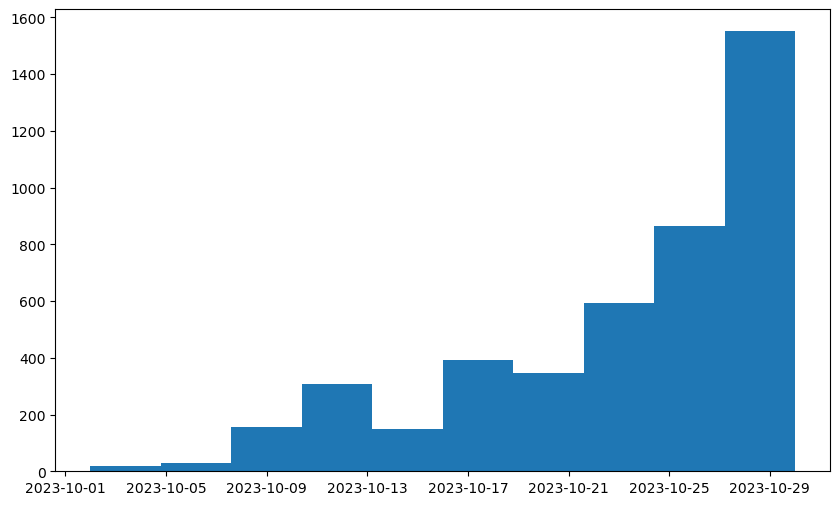

In [1307]:
# histogram plot of date 
plt.figure(figsize=(10,6))
plt.hist(df['Date'], bins=10)
plt.show()

In [1308]:
df['Date'].unique()

array(['2023-10-30T00:00:00.000000000', '2023-10-19T00:00:00.000000000',
       '2023-10-23T00:00:00.000000000', '2023-10-03T00:00:00.000000000',
       '2023-10-12T00:00:00.000000000', '2023-10-24T00:00:00.000000000',
       '2023-10-25T00:00:00.000000000', '2023-10-17T00:00:00.000000000',
       '2023-10-11T00:00:00.000000000', '2023-10-20T00:00:00.000000000',
       '2023-10-28T00:00:00.000000000', '2023-10-29T00:00:00.000000000',
       '2023-10-27T00:00:00.000000000', '2023-10-26T00:00:00.000000000',
       '2023-10-14T00:00:00.000000000', '2023-10-18T00:00:00.000000000',
       '2023-10-06T00:00:00.000000000', '2023-10-08T00:00:00.000000000',
       '2023-10-21T00:00:00.000000000', '2023-10-16T00:00:00.000000000',
       '2023-10-10T00:00:00.000000000', '2023-10-05T00:00:00.000000000',
       '2023-10-09T00:00:00.000000000', '2023-10-22T00:00:00.000000000',
       '2023-10-04T00:00:00.000000000', '2023-10-13T00:00:00.000000000',
       '2023-10-15T00:00:00.000000000', '2023-10-02

In [1309]:
df['Description'].unique()

array(['4 bedroom terraced duplex for rent',
       'self contain (single rooms) for rent',
       '1 bedroom mini flat (room and parlour) for rent',
       '2 bedroom semi-detached duplex for rent',
       '3 bedroom detached bungalow for rent',
       '3 bedroom flat / apartment for rent',
       '4 bedroom semi-detached duplex for rent',
       '5 bedroom detached duplex for rent',
       '4 bedroom flat / apartment for rent',
       '2 bedroom flat / apartment for rent',
       '4 bedroom detached duplex for rent',
       '5 bedroom flat / apartment for rent', '4 bedroom house for rent',
       '2 bedroom house for rent', '1 bedroom flat / apartment for rent',
       '1 bedroom semi-detached duplex for rent',
       '2 bedroom terraced bungalow for rent',
       '5 bedroom terraced duplex for rent',
       '3 bedroom terraced duplex for rent', '3 bedroom house for rent',
       '5 bedroom semi-detached duplex for rent',
       '1 bedroom house for rent', '7 bedroom detached duplex 

In [1310]:
df.head(50)

,Date,Description,Location,Currency,Amount,Period,House_type,Bedrooms,Serviced
1,2023-10-30,4 bedroom terraced duplex for rent,"Ajah, Lagos",₦,"3,500,000",per annum,Type: Terraced Duplex,Bedrooms: 4,None
2,2023-10-30,self contain (single rooms) for rent,"Off Chevron Toll Gate, Orchid Road, Lekki, Lagos",₦,"950,000",per annum,Type: Self Contain (Single Rooms),Bathrooms: 1,Serviced
3,2023-10-30,1 bedroom mini flat (room and parlour) for rent,"Royal Homes Back Of Catholic Church Gra, Abij...",₦,"800,000",per annum,Type: Mini Flat (Room and Parlour),Bedrooms: 1,None
4,2023-10-30,self contain (single rooms) for rent,"Chevy Veiw Estate Along Chevron Drive Lagos, ...",₦,"1,500,000",per annum,Type: Self Contain (Single Rooms),Bathrooms: 1,Serviced
5,2023-10-30,2 bedroom semi-detached duplex for rent,"Off Chevron Toll Gate, Orchid Road, Lekki, Lagos",₦,"3,500,000",per annum,Type: Semi-detached Duplex,Bedrooms: 2,Serviced
6,2023-10-30,3 bedroom detached bungalow for rent,"Directly On 3rd Avenue, Gwarinpa, Abuja",₦,"15,000,000",per annum,Type: Detached Bungalow,Bedrooms: 3,None
8,2023-10-30,3 bedroom flat / apartment for rent,"Banana Island, Ikoyi, Lagos",₦,"25,000,000",per annum,Type: Flat / Apartment,Bedrooms: 3,Serviced
9,2023-10-30,4 bedroom semi-detached duplex for rent,"Oral Estate, Lekki, Lagos",₦,"4,500,000",per annum,Type: Semi-detached Duplex,Bedrooms: 4,None
10,2023-10-30,3 bedroom flat / apartment for rent,"Before Blenco, Sangotedo, Ajah, Lagos",₦,"2,000,000",per annum,Type: Flat / Apartment,Bedrooms: 3,None
11,2023-10-30,5 bedroom detached duplex for rent,"Ologolo, Lekki, Lagos",₦,"5,000,000",per annum,Type: Detached Duplex,Bedrooms: 5,None


In [1311]:
# clean location 
df['Location'].unique()

array([' Ajah, Lagos',
       ' Off Chevron Toll Gate, Orchid Road, Lekki, Lagos',
       ' Royal Homes Back Of Catholic Church Gra, Abijo, Lekki, Lagos',
       ..., ' Unilag Estate, Apeka, Ikorodu, Lagos',
       ' Familoni Street, Igbo Efon, Lekki, Lagos',
       ' Before Paradise Estate, Life Camp, Abuja'], dtype=object)

In [1312]:
location_list = ['Ajah', 'Orchid', 'Abijo', 'Chevron', 'Gwarinpa', 'Banana Island',
       'Oral Estate', 'Ologolo', 'Gbagada', 'Kubwa', 'Ikeja',
       'Magodo', 'Lugbe District', 'Ikota', 'Isolo', 'Idado',
       'Bogije', 'Lokogoma District', 'Jabi', 'Lekki Phase 1',
       'Osapa London', 'Oniru', 'Awoyaya', 'Ikoyi',
       'GRA Phase 3, Port Harcourt', 'Port Harcourt', 'Rumuibekwe',
       'Tombia Extension Gra', 'Rumuokwurusi', 'Apo', 'Jahi',
       'Ikate Elegushi', 'Victoria Island', 'Ikate', 
       'Idu Industrial', 'Salem', 'Ikorodu', 'Durumi',
       'Kaura', 'Alagomeji',
       'VGC', 'Pedro, Gbagada', 'Asokoro District', 'Guzape District',
       'Agungi', 'Adekunle', 'New Road',
       'Katampe Extension', 'Katampe', 'Wuye', 'Isheri North', 'Ibeshe',
       'New Haven', 'GRA Phase 2, Magodo', 'Ogudu', 'Ogba', 'Sangotedo',
       'Ipaja', 'Eleganza', 'Yaba', 'Agbado', 'Life Camp',
       'Alagbado', 'Igando', 'Maryland', 'Ada George', 'Garki', 'Elewura',
       'Surulere', 'Oluyole Extension', 'Elebu', 'Galadimawa',
       'Gaduwa', 'Maitama District', 'Osborne', 'Utako',
       'Oregun', 'Magboro', 'Akoka', 'Eliozu', 'Mabushi', 'Ketu', 'Karmo',
       'Trans Amadi', 'Agege', 'Dutse', 'Ilasan', 'Rumuodara',
       'GRA Phase 1, Magodo', 'Ojodu', 'Allen', 'Alausa',
       'Ibeju Lekki', 'Ojodu Berger', 'Ilaje', 'Rumuebekwe',
       'Olokonla', 'Lakowe', 'Igbo Efon', 'Wuse 2', 'Baiyeku', 'Jakande',
       'Chisco', 'Opebi', 'Mbora (Nbora)', 'Abule Oja', 'Karu',
       'Iwaya', 'Lekki Phase 2', 'Ologuneru', 'Kado', 'Onike', 'Wuse',
       'Alapere', 'Ikeja GRA', 'Trans Ekulu', 'Fola Agoro', 'Ibadan',
       'Lafiaji', 'Ori-oke', 'Ojota', 'Benin', 'Olowora', 'Egbeda',
       'Mgboba', 'Shomolu', 'Ajiran', 'Dakibiyu', 'Berger', 'Karsana',
       'Abule Ijesha', 'Jibowu', 'Eleko', 'Zuba', 'Sabo', 'Arepo',
       'Alasia', 'Ilupeju', 'Ogombo', 'Erunwen', 'Gudu', 'Adeniyi Jones',
       'Ikotun', 'Omole Phase 2', 'Bwari', 'Abraham Adesanya', 'Oshodi',
       'Mushin', 'Ayobo', 'Oke Afa', 'Enugu',
       'Jakande', 'GRA Phase 2, Port Harcourt', 'Akobo', 'Ajiwe', 'Agungi', 'Lekki']

for index, row in df.iterrows():
    for location in location_list:
        if location in row['Location']:
                df.loc[index, 'Loc'] = location

In [1313]:
# for index, row in df.iterrows():
#     location_split = row['Location'].split(',')
#     if len(location_split) > 2:
#         df.loc[index, 'Loc'] = location_split[1]
#     elif len(location_split) == 3:
#         df.loc[index, 'Loc'] = location_split[0]
#     else:
#         df.loc[index, 'Loc'] = location_split[0]
#     # print(location_split)

In [1314]:
df.head()

,Date,Description,Location,Currency,Amount,Period,House_type,Bedrooms,Serviced,Loc
1,2023-10-30,4 bedroom terraced duplex for rent,"Ajah, Lagos",₦,"3,500,000",per annum,Type: Terraced Duplex,Bedrooms: 4,None,Ajah
2,2023-10-30,self contain (single rooms) for rent,"Off Chevron Toll Gate, Orchid Road, Lekki, Lagos",₦,"950,000",per annum,Type: Self Contain (Single Rooms),Bathrooms: 1,Serviced,Lekki
3,2023-10-30,1 bedroom mini flat (room and parlour) for rent,"Royal Homes Back Of Catholic Church Gra, Abij...",₦,"800,000",per annum,Type: Mini Flat (Room and Parlour),Bedrooms: 1,None,Lekki
4,2023-10-30,self contain (single rooms) for rent,"Chevy Veiw Estate Along Chevron Drive Lagos, ...",₦,"1,500,000",per annum,Type: Self Contain (Single Rooms),Bathrooms: 1,Serviced,Lekki
5,2023-10-30,2 bedroom semi-detached duplex for rent,"Off Chevron Toll Gate, Orchid Road, Lekki, Lagos",₦,"3,500,000",per annum,Type: Semi-detached Duplex,Bedrooms: 2,Serviced,Lekki


In [1315]:
df['Loc'] = df['Loc'].str.strip()

In [1316]:
df['Loc'].value_counts()

Lekki              2005
Ikoyi               423
Victoria Island     309
Ajah                182
Sangotedo           153
                   ... 
Mbora (Nbora)         1
Benin                 1
Rumuokwurusi          1
Ojota                 1
Akobo                 1
Name: Loc, Length: 115, dtype: int64

In [1317]:
for index, row in df.iterrows():
    if 'Lekki' == row['Loc']:
        # lekki_split = row['Location'].split
        # df.loc[index, 'Loc'] = lekki_split
        print(row)

Date                                         2023-10-30 00:00:00
Description                 self contain (single rooms) for rent
Location        Off Chevron Toll Gate, Orchid Road, Lekki, Lagos
Currency                                                       ₦
Amount                                                   950,000
Period                                                 per annum
House_type                     Type: Self Contain (Single Rooms)
Bedrooms                                            Bathrooms: 1
Serviced                                                Serviced
Loc                                                        Lekki
Name: 2, dtype: object
Date                                         2023-10-30 00:00:00
Description      1 bedroom mini flat (room and parlour) for rent
Location        Royal Homes Back Of Catholic Church Gra, Abij...
Currency                                                       ₦
Amount                                                   800,000
Pe

In [1318]:
null_values = df[df.isna().any(axis=1)]
null_values.head(20)

,Date,Description,Location,Currency,Amount,Period,House_type,Bedrooms,Serviced,Loc
376,2023-10-29,3 bedroom terraced duplex for rent,"Galadimawa Round About, Galadimawa, Abuja",₦,"2,500,000",NaN,Type: Terraced Duplex,Bedrooms: 3,None,Galadimawa
1078,2023-10-27,4 bedroom house for rent,"Lekki Phase 1, Lekki, Lagos",₦,"8,500,000",NaN,Type: House,Bedrooms: 4,Serviced,Lekki
1081,2023-10-27,3 bedroom flat / apartment for rent,"Shonola Street, Aguda Bus Stop, Ogba, Ikeja, ...",₦,"1,200,000",NaN,Type: Flat / Apartment,Bedrooms: 3,None,Ogba
1170,2023-10-26,4 bedroom house for rent,"Vgc Lekki Lagos, VGC, Lekki, Lagos",₦,"6,000,000",NaN,Type: House,Bedrooms: 4,None,Lekki
1632,2023-10-25,4 bedroom terraced duplex for rent,"Ikate, Lekki, Lagos",₦,"7,000,000",NaN,Type: Terraced Duplex,Bedrooms: 4,Serviced,Lekki
1756,2023-10-25,2 bedroom flat / apartment for rent,"Sunview Estate Lbs, Ajah, Lagos",₦,"2,000,000",NaN,Type: Flat / Apartment,Bedrooms: 2,None,Ajah
1822,2023-10-25,3 bedroom flat / apartment for rent,"3rd Avenue, Banana Island Estate, Ikoyi, Lagos",₦,"17,000,000",NaN,Type: Flat / Apartment,Bedrooms: 3,None,Ikoyi
2007,2023-10-30,4 bedroom terraced duplex for rent,"Ikota, Lekki, Lagos",₦,"4,000,000",NaN,Type: Terraced Duplex,Bedrooms: 4,None,Lekki
2056,2023-10-24,self contain (single rooms) for rent,"Buena Vista Estate, Lekki, Lagos",₦,"800,000",NaN,Type: Self Contain (Single Rooms),Bathrooms: 1,None,Lekki
2070,2023-10-24,3 bedroom terraced duplex for rent,"Orchid Road, Lekki Expressway, Lekki, Lagos",₦,"4,000,000",NaN,Type: Terraced Duplex,Bedrooms: 3,None,Lekki


In [1319]:
for index, row in df.iterrows():
    if 'Mobil Road' in row['Location'] and 'Lekki' in row['Loc']:
        df.loc[index, 'Loc'] = 'Ilaje'

In [1320]:
for index, row in df.iterrows():
    if 'Lekki Phase 1' in row['Location'] and 'Lekki' in row['Loc']:
        df.loc[index, 'Loc'] = 'Lekki Phase 1'

In [1321]:
# for index, row in df.iterrows():
#     if 'Eleganza' in row['Location'] and 'Orchid' in row['Loc']:
#         df.loc[index, 'Loc'] = 'Orchid'
#         # print(row)

In [1322]:
for index, row in df.iterrows():
    if 'Ogombo' in row['Location'] or 'Off Ogombo Road' in row['Location'] or 'K1 Behind Peninsular Garden Good News Estate' in row['Location'] or 'Goodnews Estate' in row['Location']:
        df.loc[index, 'Loc'] = 'Ogombo'
#         # print(row)

In [1323]:
# for index, row in df.iterrows():
#     if 'Just 2 Minutes To Apo By Ap' in row['Loc'] or 'Before Cedar Crest Hospital' in row['Loc']:
#         df.loc[index, 'Loc'] = 'Apo'

In [1324]:
for index, row in df.iterrows():
    if 'Sangoteedo' in row['Location'] or 'Off Blenco Supermarket' in row['Location']:
        df.loc[index, 'Loc'] = 'Sangotedo'

In [1325]:
for index, row in df.iterrows():
    if 'New Road 1' in row['Location'] or 'Alpha Beach Rd' in row['Location'] or 'Off New Road' in row['Location'] or 'New Road Busstop' in row['Location'] or 'new Road' in row['Location'] or 'Alpha Beach Road' in row['Location'] or 'New Road' in row['Location']:
        df.loc[index, 'Loc'] = 'New Road'

In [1326]:
df.head(50)

,Date,Description,Location,Currency,Amount,Period,House_type,Bedrooms,Serviced,Loc
1,2023-10-30,4 bedroom terraced duplex for rent,"Ajah, Lagos",₦,"3,500,000",per annum,Type: Terraced Duplex,Bedrooms: 4,None,Ajah
2,2023-10-30,self contain (single rooms) for rent,"Off Chevron Toll Gate, Orchid Road, Lekki, Lagos",₦,"950,000",per annum,Type: Self Contain (Single Rooms),Bathrooms: 1,Serviced,Lekki
3,2023-10-30,1 bedroom mini flat (room and parlour) for rent,"Royal Homes Back Of Catholic Church Gra, Abij...",₦,"800,000",per annum,Type: Mini Flat (Room and Parlour),Bedrooms: 1,None,Lekki
4,2023-10-30,self contain (single rooms) for rent,"Chevy Veiw Estate Along Chevron Drive Lagos, ...",₦,"1,500,000",per annum,Type: Self Contain (Single Rooms),Bathrooms: 1,Serviced,Lekki
5,2023-10-30,2 bedroom semi-detached duplex for rent,"Off Chevron Toll Gate, Orchid Road, Lekki, Lagos",₦,"3,500,000",per annum,Type: Semi-detached Duplex,Bedrooms: 2,Serviced,Lekki
6,2023-10-30,3 bedroom detached bungalow for rent,"Directly On 3rd Avenue, Gwarinpa, Abuja",₦,"15,000,000",per annum,Type: Detached Bungalow,Bedrooms: 3,None,Gwarinpa
8,2023-10-30,3 bedroom flat / apartment for rent,"Banana Island, Ikoyi, Lagos",₦,"25,000,000",per annum,Type: Flat / Apartment,Bedrooms: 3,Serviced,Ikoyi
9,2023-10-30,4 bedroom semi-detached duplex for rent,"Oral Estate, Lekki, Lagos",₦,"4,500,000",per annum,Type: Semi-detached Duplex,Bedrooms: 4,None,Lekki
10,2023-10-30,3 bedroom flat / apartment for rent,"Before Blenco, Sangotedo, Ajah, Lagos",₦,"2,000,000",per annum,Type: Flat / Apartment,Bedrooms: 3,None,Sangotedo
11,2023-10-30,5 bedroom detached duplex for rent,"Ologolo, Lekki, Lagos",₦,"5,000,000",per annum,Type: Detached Duplex,Bedrooms: 5,None,Lekki


In [1327]:
# this code is not applying the row
for index, row in df.iterrows():
    if 'Vandan Estate' in row['Location'] or 'Jedmond Estate' in row['Location']:
        df.loc[index, 'Loc'] = 'Orchid'
        

In [1328]:
for index, row in df.iterrows():
    if 'Banana Island' in row['Location'] and 'Ikoyi' in row['Loc']:
        df.loc[index, 'Loc'] = 'Banana Island'
        


In [1329]:
for index, row in df.iterrows():
    if 'Vgc' in row['Location'] or 'Harris Drive' in row['Location'] or 'VGC' in row['Location']:
        df.loc[index, 'Loc'] = 'VGC'
        

In [1330]:
for index, row, in df.iterrows():
    if 'Oniru' in row['Location']:
        df.loc[index, 'Loc'] = 'Oniru'
        

In [1331]:
for index, row in df.iterrows():
    if 'Oral Estate' in row['Location']:
        df.loc[index, 'Loc'] = 'Eleganza'
        

In [1332]:
for index, row in df.iterrows():
    if 'Chevron Drive' in row['Location'] and 'Lekki' in row['Loc']:
        df.loc[index, 'Loc'] = 'Chevron'
        

In [1333]:
for index, row in df.iterrows():
    if 'GRA Phase 2' in row['Location'] and 'Port Harcourt' in row['Loc']:

        df.loc[index, 'Loc'] = 'GRA Phase 2, Port Harcourt'
        

In [1334]:
for index, row in df.iterrows():
    if 'GRA Phase 3' in row['Location'] and 'Port Harcourt' in row['Loc']:

        df.loc[index, 'Loc'] = 'GRA Phase 3, Port Harcourt'
        

In [1335]:
for index, row in df.iterrows():
    if 'Phase 1' in row['Location'] and 'Lekki' == row['Loc']:
        df.loc[index, 'Loc'] = 'Lekki Phase 1'

In [1336]:
for index, row in df.iterrows():
    if 'Orchid' in row['Location'] and 'Lekki' in row['Loc']:
        df.loc[index, 'Loc'] = 'Orchid'

In [1337]:
for index, row in df.iterrows():
    if 'ikota' in row['Location'] or 'Lekki County' in row['Location'] or 'Lekky County' in row['Location'] or 'Megamound' in row['Location'] or 'Ikota' in row['Location']:
        df.loc[index, 'Loc'] = 'Ikota'

In [1338]:
for index, row in df.iterrows():
    if 'Ologolo' in row['Location'] or 'White Sands Beach Estate' in row['Location'] or 'Oceanbreeze Estate' in row['Location']: 
        df.loc[index, 'Loc'] = 'Ologolo'
        

In [1339]:
# for index, row in df.iterrows():
#     if 'Victoria Island (VI)' == row['Loc'] or 'Eko Atlantic City' in row['Loc'] or 'Vi' in row['Loc'] or 'Near 1004 Flats' in row['Loc'] or 'Dideolu Estate' in row['Loc'] or 'By Landmark Event Center' in row['Loc'] or 'Goriola Street' in row['Loc'] or 'Close To Mega Plaza' in row['Loc']:
#         df.loc[index, 'Loc'] = 'Victoria Island'
        

In [1340]:
for index, row in df.iterrows():
    if 'Off Admiralty' in row['Location'] or 'Lekki Phase1' in row['Location']  or 'Lekki Phase One' in row['Location'] or 'Maruwa Axis' in row['Location']:
        df.loc[index, 'Loc'] = 'Lekki Phase 1'

In [1341]:
for index, row in df.iterrows():
    if 'Mobile Estate' in row['Location'] or 'Lekki Scheme 2' in row['Location']:
        df.loc[index,'Loc'] = 'Ilaje'

In [1342]:
for index, row in df.iterrows():
    if 'Ikoyi' == row['Location'] and 'Jakande' in row['Loc']:
        df.loc[index, 'Loc'] = 'Ikoyi'

In [1343]:
for index, row in df.iterrows():
    if 'Osborne' in row['Location'] and 'Ikoyi' in row['Loc']:
        df.loc[index, 'Loc'] = 'Osborne'

In [1344]:


for index, row in df.iterrows():
    if any(chevron_location in row['Location'] for chevron_location in ['Chevron', 'Carlton Gate Estate', 'Cheveron Alternative','chevron Drive','Chevy View Estate', 'Off Chevron Toll Gate', 'Chevyview Estate', 'Milverton Chevron', 'Tulip Haven Chevron', 'Chevron Lekki', 'Northern Foreshore Estate Chevron',  'Chevy View', 'Bera Estate Chevron', 'Bera Estate', 'Chevron By Northern Foreshore Estate', 'Chevron Alternative Estate', 'Chevron Alternative Route', 'Chevron Conservation Estate','Chevron Alternative']):
        df.loc[index, 'Loc'] = 'Chevron'

In [1345]:
for index, row in df.iterrows():
    if any(locations in row['Location'] for locations in ['orchid Road','Lekki Conservative Axis', 'Orchid Chevron','By Mega 1 Plaza','Royal Pine Orchid','Llc','Opposite Chevron','opposite Chevron','Coral- Reef Apartment Orchid','Orchild Road','Lekki Conservative Center','Buena Vista Estate','Royal Pine Estate','Coleman Nwafor Estate','Conservation Axis','Conservation','Victoria Bay Royal Pine','Coleman Estate', 'By Eleganza Bus-stop','Orchid Hotel Road', 'Cooplag Estate Off Orchid Road', 'Off Orchid Road Close To Pottersland School', 'Orchid Road', 'Orchid Area', 'Lekki Conservation Area', 'Lekki Conservation Axis','Lekki Conservation Road', 'Victoria Bay Estate', 'By Lekki 2nd Toll Gate Eleganza', 'opposite Mega 1', 'Opposite Mega 1', 'After Chevron Close To Lekki Conservative', 'Conservation Road Chevron',' Royal Pine Estate Orchid Road Eleganza Bustop', 'Victoria Bay Estate Estate Orchid Road', 'Buene Vista Estate', 'Conservation Road', 'Lekki Conservation', 'Victoria Bay Estate Orchid Road Eleganza Bustop', 'Gracefield Court Orchid Road Eleganza Bustop', 'Victoria Crest 4 Orchid Road', 'By Second Toll Gate', 'Orchid Road', 'Orchid road']):
        df.loc[index, 'Loc'] = 'Orchid'

In [1346]:
# for index, row in df.iterrows():
#     if 'Beechwood' in row['Loc'] or 'Oribanwa' in row['Location'] or 'Onosa' in row['Loc'] or 'Eputu' in row['Loc'] or 'By Mayfair Garden' in row['Loc']:
#         df.loc[index, 'Loc'] = 'Ibeju Lekki'
        

In [1347]:
for index, row in df.iterrows():
    if 'Katampe Extension' in row['Location']:
        df.loc[index, 'Loc'] = 'Katampe Extension'

In [1348]:
for index, row in df.iterrows():
    if 'Osapa' in row['Location'] and 'Lekki' in row['Loc']:
        df.loc[index, 'Loc'] = 'Osapa London'


    

In [1349]:
for index, row in df.iterrows():
    if any(ikate_location in row['Location'] for ikate_location in ['Ikate','Jose Maria Escriva Street','Plantinum Way, Ikate','Kunsela, Ikate','Freedom Way','Ikate, Lekki Phase 2','Prime Water Gardens','Ikate, Ikate','Ikate Right','Nike Art Gallery Road, Ikate', 'Nicon Town Ikate', 'Horizon 2, Ikate', 'Off Kusenla Road', 'Off Nicon Estate',  'Mercedes Benz, Ikate', 'Gbangada, Ikate', 'Off Freedom Way', 'Prime Water Garden Estate By Freedom Way', 'Platinum Way', 'Off White Sand School', 'Nike Art Gallery', 'Off Spar Road, Ikate','Kunsela Road', 'The Property Located At Ikate', 'Beside Richmond Estate, Ikate', 'Spa Road', 'Richmond Estate Lekki Right, Ikate', 'Seagate Estate, Ikate','By Niki Art Gallery, Ikate','Lekki Garden Horizons 2extension, Ikate', 'On Meadow Hall Schools Road, Ikate','Cowrie Creek Estate, Ikate', 'Richmond Gate Estate, Ikate']):
        df.loc[index, 'Loc'] = 'Ikate'

In [1350]:
for index, row in df.iterrows():
    if 'Sanlem' in row['Location'] or 'Nicon Town' in row['Location'] or 'Salem' in row['Location']:
        df.loc[index, 'Loc'] = 'Salem'

In [1351]:
for index, row in df.iterrows():
    if 'Ilason' in row['Location'] or'Illasan Elegushi' in row['Location'] or 'Ilasan' in row['Location']:
        df.loc[index, 'Loc'] = 'Ilasan'
        

In [1352]:
for index, row in df.iterrows():
    if '2nd Tollgate' in row['Location'] or '2nd Toll Gate' in row['Location']  or 'Second Toll Gate' in row['Location']:
        df.loc[index, 'Loc'] = 'Eleganza'
        
        

In [1353]:
for index, row in df.iterrows():
    if 'Yaba' in row['Location']:
        df.loc[index, 'Loc'] = 'Yaba'
        

In [1354]:
for index, row in df.iterrows():
    if 'Bananas ð\x9f\x8d\x8c Island ð\x9f\x8f\x9dï¸\x8f' in row['Location'] or 'Banana ð\x9f\x8d\x8c Island ð\x9f\x8f\x9dï¸\x8f' in row['Location'] or 'Banana Island Estate' in row['Location']:
        df.loc[index, 'Loc'] = 'Banana Island'
        

In [1355]:
for index, row in df.iterrows():
    if 'Ikate Elegushi' in row['Location'] or 'Meadow Hall Way' in row['Location'] or 'Horizon 2 Estate' in row['Location']:
        df.loc[index, 'Loc'] = 'Ikate Elegushi'

In [1356]:
for index, row in df.iterrows():
    if 'Lekki Phase 1' in row['Location'] and 'Lekki' in row['Location']:
        df.loc[index, 'Loc'] = 'Lekki Phase 1'

In [1357]:
for index, row in df.iterrows():
    if 'Aja Badore Side' in row['Location'] or 'Thomas Estate' in row['Location']:
        df.loc[index, 'Loc'] = 'Ajah'

In [1358]:
for index, row in df.iterrows():
    if 'Area 8' in row['Location'] and 'Abuja' in row['Location']:
        df.loc[index, 'Loc'] = 'Garki'
        

In [1359]:
for index, row in df.iterrows():
    if 'Okun Ajah Bustop' in row['Location']:
        df.loc[index, 'Loc'] = 'Okun Ajah'

In [1360]:
for index, row in df.iterrows():
    if 'Igboefon Road' in row['Location'] or 'Off Alpha Beach' in row['Location'] or 'Spg Road/ Igbo-efo Gra' in row['Location'] or 'Eti-osa Igbo-efo Gra' in row['Location'] or 'Atlantic View Estate' in row['Location'] or 'Gated Estate Off Spg Road' in row['Location'] or 'Igbo Efon' in row['Location']:
        df.loc[index, 'Loc'] = 'Igbo Efon'

In [1361]:
for index, row in df.iterrows():
    if 'New Road' in row['Location'] and 'Igbo Efon' in row['Location']:
        df.loc[index, 'Loc'] = "Igbo Efon"

In [1362]:
for index, row in df.iterrows():
    if 'University View Estate' in row['Location'] or 'Opposite Lagos Business School (lbs)' in row['Location'] or 'Lagos Business School' in row['Location'] or 'Lagos Business School' in row['Location'] or 'Close To Lbs' in row['Location'] or 'Salton Garden Estate' in row['Location'] or 'Behind Lbs' in row['Location'] or 'Olokonka' in row['Location'] or 'Olokonla' in row['Location']:
        df.loc[index,'Loc'] = 'Olokonla'

In [1363]:
for index, row in df.iterrows():
    if 'Abijo' in row['Location'] or 'Abijoh' in row['Location']:
        df.loc[index, 'Loc'] = 'Abijo'
       

In [1364]:
for index, row in df.iterrows():
    if 'By Lekki Palm City' in row['Loc']:
        df.loc[index, 'Loc'] = 'Ajah'

In [1365]:
for index, row in df.iterrows():
    if 'Oba Elegushi Housing Estate Mobil Road' in row['Location']:
        df.loc[index, 'Loc'] = 'Ilaje'

In [1366]:
for index, row in df.iterrows():
    if 'Lekki Gardens' in row['Location']:
        df.loc[index, 'Loc'] = 'Lekki Phase 2'

In [1367]:
for index, row in df.iterrows():
    if 'Opposite Abraham Adesanya Estate' in row['Location'] or 'Abraham Adesunya Scheme 2' in row['Location'] or 'Off Abraham Adesanya Road' in row['Location'] or 'Abraham Adesanya Estate' in row['Location']: 
        df.loc[index, 'Loc'] = 'Abraham Adesanya'

In [1368]:
for index, row in df.iterrows():
    if 'Ibrahim Atere Way Off Beachgate Road.' in row['Location'] or 'Cicle Mall' in row['Location'] or 'Lekki Jakunde Gbara' in row['Location'] or 'Jakunde Gbara' in row['Location'] or 'Jakande' in row['Location']:
        df.loc[index, 'Loc'] = 'Jakande'

In [1369]:
for index, row in df.iterrows():
    if 'Awoyaya' in row['Location'] and 'Ibeju Lekki' in row['Location']: 
        df.loc[index, 'Loc'] = 'Awoyaya'

In [1370]:
for index, row in df.iterrows():
    if 'Akobo' in row['Location']:
        df.loc[index, 'Loc'] = 'Ibadan'

In [1371]:
for index, row in df.iterrows():
    if 'Road 6' in row['Location'] or 'Ajiwe' in row['Location']:
        df.loc[index, 'Loc'] = 'Ajiwe'

In [1372]:
for index, row in df.iterrows():
    if 'Ibeju Lekki' in row['Location'] and 'Lekki' in row['Loc']:
        df.loc[index, 'Loc'] = 'Ibeju Lekki'

In [1373]:
for index, row in df.iterrows():
    if 'Idado' in row['Location'] and 'Lekki' in row['Loc']:
        df.loc[index, 'Loc'] = 'Idado'

In [1374]:
for index, row in df.iterrows():
    if 'Agungi' in row['Location'] and 'Lekki' in row['Loc']:
        df.loc[index, 'Loc'] = 'Agungi'

In [1375]:
for index, row in df.iterrows():
    if 'Ajah' in row['Location'] and 'Lekki' in row['Loc']:
        df.loc[index, 'Loc'] = 'Ajah'

In [1376]:
for index, row in df.iterrows():
    if 'Lekki Phase 2' in row['Location'] and 'Lekki' in row['Loc']:
        df.loc[index, 'Loc'] = 'Lekki Phase 2'

In [1377]:
# this should be done
# after all columns containing Lekki has been cleaned and corresponds to correct location after researched
# we only want either Lekki Phase 1 or Lekki Phase 2

for index, row in df.iterrows():
    if 'Lekki' == row['Loc']:
        df.loc[index, 'Loc'] = 'Lekki Phase 1'

In [1378]:
df['Loc'].unique()

array(['Ajah', 'Orchid', 'Abijo', 'Chevron', 'Gwarinpa', 'Banana Island',
       'Eleganza', 'Sangotedo', 'Ologolo', 'Gbagada', 'Kubwa',
       'Ikeja GRA', 'GRA Phase 2, Magodo', 'Lugbe District', 'Ikota',
       'Olokonla', 'Isolo', 'Idado', 'Ibeju Lekki', 'Ogombo',
       'Lokogoma District', 'Ilaje', 'Jabi', 'Lekki Phase 1',
       'Osapa London', 'Oniru', 'Awoyaya', 'Ikoyi',
       'GRA Phase 3, Port Harcourt', 'Port Harcourt', 'Rumuibekwe',
       'Tombia Extension Gra', 'Rumuokwurusi', 'Jahi', 'Apo', 'Olowora',
       'Ikate Elegushi', 'Ikate', 'Idu Industrial', 'Salem', 'Ikorodu',
       'Durumi', 'Abraham Adesanya', 'Kaura', 'Yaba', 'Pedro, Gbagada',
       'Asokoro District', 'VGC', 'Guzape District', 'Agungi',
       'Victoria Island', 'Adeniyi Jones', 'New Road',
       'Katampe Extension', 'Katampe', 'Wuye', 'Isheri North', 'Ibeshe',
       'Enugu', 'Igbo Efon', 'Ogudu', 'Ogba', 'Ilasan', 'Ipaja', 'Alasia',
       'Agbado', 'Life Camp', 'Alagbado', 'Igando', 'Maryland',
  

In [1379]:
for index, row in df.iterrows():
    if 'Lekki' == row['Loc']:
        print(row)

In [1380]:
df.head(50)

,Date,Description,Location,Currency,Amount,Period,House_type,Bedrooms,Serviced,Loc
1,2023-10-30,4 bedroom terraced duplex for rent,"Ajah, Lagos",₦,"3,500,000",per annum,Type: Terraced Duplex,Bedrooms: 4,None,Ajah
2,2023-10-30,self contain (single rooms) for rent,"Off Chevron Toll Gate, Orchid Road, Lekki, Lagos",₦,"950,000",per annum,Type: Self Contain (Single Rooms),Bathrooms: 1,Serviced,Orchid
3,2023-10-30,1 bedroom mini flat (room and parlour) for rent,"Royal Homes Back Of Catholic Church Gra, Abij...",₦,"800,000",per annum,Type: Mini Flat (Room and Parlour),Bedrooms: 1,None,Abijo
4,2023-10-30,self contain (single rooms) for rent,"Chevy Veiw Estate Along Chevron Drive Lagos, ...",₦,"1,500,000",per annum,Type: Self Contain (Single Rooms),Bathrooms: 1,Serviced,Chevron
5,2023-10-30,2 bedroom semi-detached duplex for rent,"Off Chevron Toll Gate, Orchid Road, Lekki, Lagos",₦,"3,500,000",per annum,Type: Semi-detached Duplex,Bedrooms: 2,Serviced,Orchid
6,2023-10-30,3 bedroom detached bungalow for rent,"Directly On 3rd Avenue, Gwarinpa, Abuja",₦,"15,000,000",per annum,Type: Detached Bungalow,Bedrooms: 3,None,Gwarinpa
8,2023-10-30,3 bedroom flat / apartment for rent,"Banana Island, Ikoyi, Lagos",₦,"25,000,000",per annum,Type: Flat / Apartment,Bedrooms: 3,Serviced,Banana Island
9,2023-10-30,4 bedroom semi-detached duplex for rent,"Oral Estate, Lekki, Lagos",₦,"4,500,000",per annum,Type: Semi-detached Duplex,Bedrooms: 4,None,Eleganza
10,2023-10-30,3 bedroom flat / apartment for rent,"Before Blenco, Sangotedo, Ajah, Lagos",₦,"2,000,000",per annum,Type: Flat / Apartment,Bedrooms: 3,None,Sangotedo
11,2023-10-30,5 bedroom detached duplex for rent,"Ologolo, Lekki, Lagos",₦,"5,000,000",per annum,Type: Detached Duplex,Bedrooms: 5,None,Ologolo


In [1381]:
# clean price

df['Amount'] = df['Amount'].astype(str).str.replace(',', '')
df['Amount'] = df['Amount'].astype(int)

In [1382]:
# clean currency
df['Currency'].unique()

array(['₦', '$'], dtype=object)

In [1383]:
dollar_price = df[df['Currency'] == '$']
dollar_price.head(50)

# should we drop rows with $ pricing, because this would cause outliers in the dataset
# if decided, plot the average price of homes by their pricing
# compare homes like lekki phase 1 and lekki
#  ikota villa estate and ikota lekki county homes
#  if their averages are close should we consolidate this data together

,Date,Description,Location,Currency,Amount,Period,House_type,Bedrooms,Serviced,Loc
236,2023-10-30,3 bedroom flat / apartment for rent,"Victoria Island (VI), Lagos",$,100000,per annum,Type: Flat / Apartment,Bedrooms: 3,None,Victoria Island
244,2023-10-30,3 bedroom flat / apartment for rent,"Old Ikoyi, Ikoyi, Lagos",$,35000,per annum,Type: Flat / Apartment,Bedrooms: 3,Serviced,Ikoyi
324,2023-10-30,5 bedroom house for rent,"Bananas ð Island ðï¸, Lekki, Lagos",$,120000000,per annum,Type: House,Bedrooms: 5,None,Banana Island
704,2023-10-28,4 bedroom flat / apartment for rent,"Old Ikoyi, Ikoyi, Lagos",$,100000,per annum,Type: Flat / Apartment,Bedrooms: 4,Serviced,Ikoyi
723,2023-10-27,3 bedroom flat / apartment for rent,"Ikoyi, Lagos",$,35000,per annum,Type: Flat / Apartment,Bedrooms: 3,Serviced,Ikoyi
766,2023-10-28,3 bedroom flat / apartment for rent,"By Dunes, Maitama District, Abuja",$,45000,per annum,Type: Flat / Apartment,Bedrooms: 3,None,Maitama District
1014,2023-10-30,3 bedroom flat / apartment for rent,"Maitama District, Abuja",$,30000,per annum,Type: Flat / Apartment,Bedrooms: 3,Serviced,Maitama District
1339,2023-10-26,2 bedroom flat / apartment for rent,"Jabi, Abuja",$,15000,per annum,Type: Flat / Apartment,Bedrooms: 2,Serviced,Jabi
1658,2023-10-25,4 bedroom terraced duplex for rent,"Ikoyi, Lagos",$,25000,per annum,Type: Terraced Duplex,Bedrooms: 4,Serviced,Ikoyi
1982,2023-10-30,3 bedroom flat / apartment for rent,"Off Adeola Odeku, Victoria Island (VI), Lagos",$,60000,per annum,Type: Flat / Apartment,Bedrooms: 3,Serviced,Victoria Island


In [1384]:
naira_price = df[(df['Currency'] == '₦')  &  (df['Loc' ] == 'Ajah')]
naira_price.head(10)

,Date,Description,Location,Currency,Amount,Period,House_type,Bedrooms,Serviced,Loc
1,2023-10-30,4 bedroom terraced duplex for rent,"Ajah, Lagos",₦,3500000,per annum,Type: Terraced Duplex,Bedrooms: 4,None,Ajah
57,2023-10-30,1 bedroom mini flat (room and parlour) for rent,"Lekki Gardens Estate, Phase 1, Off Blenco Sup...",₦,1000000,per annum,Type: Mini Flat (Room and Parlour),Bedrooms: 1,Serviced,Ajah
112,2023-10-30,1 bedroom flat / apartment for rent,"Beside Greenville, Badore, Ajah, Lagos",₦,350000,per annum,Type: Flat / Apartment,Bedrooms: 1,None,Ajah
128,2023-10-30,1 bedroom mini flat (room and parlour) for rent,"Ajah, Lagos",₦,1300000,per annum,Type: Mini Flat (Room and Parlour),Bedrooms: 1,Serviced,Ajah
139,2023-10-30,3 bedroom flat / apartment for rent,"In A Secured Estate In Blenco, Ajah, Lagos",₦,2500000,per annum,Type: Flat / Apartment,Bedrooms: 3,None,Ajah
169,2023-10-30,1 bedroom mini flat (room and parlour) for rent,"Ajah, Ajah, Lagos",₦,1300000,per annum,Type: Mini Flat (Room and Parlour),Bedrooms: 1,Serviced,Ajah
194,2023-10-29,3 bedroom terraced duplex for rent,"Lekki Gardens By Abraham Adesanya, Ajah, Lago...",₦,2200000,per annum,Type: Terraced Duplex,Bedrooms: 3,None,Ajah
212,2023-10-30,4 bedroom semi-detached duplex for rent,"Lekki Gardens Phase 1, Ajah, Lagos",₦,3000000,per annum,Type: Semi-detached Duplex,Bedrooms: 4,None,Ajah
258,2023-10-30,self contain (single rooms) for rent,"Glorious Estate, Badore, Ajah, Lagos",₦,400000,per annum,Type: Self Contain (Single Rooms),Bathrooms: 1,None,Ajah
297,2023-10-30,1 bedroom mini flat (room and parlour) for rent,"Ajah, Lagos",₦,900000,per annum,Type: Mini Flat (Room and Parlour),Bedrooms: 1,Serviced,Ajah


In [1385]:
outlier_price = df[(df['Amount'] > 200000) & (df['Currency'] == '$')]
outlier_price.head(10)

,Date,Description,Location,Currency,Amount,Period,House_type,Bedrooms,Serviced,Loc
324,2023-10-30,5 bedroom house for rent,"Bananas ð Island ðï¸, Lekki, Lagos",$,120000000,per annum,Type: House,Bedrooms: 5,None,Banana Island
2003,2023-10-23,3 bedroom flat / apartment for rent,"Off 2nd Avenue, Old Ikoyi, Ikoyi, Lagos",$,2500000,per annum,Type: Flat / Apartment,Bedrooms: 3,None,Ikoyi
3676,2023-10-17,3 bedroom block of flats for rent,"Ikoyi, Lagos",$,23000000,per annum,Type: Block of Flats,Bedrooms: 3,None,Ikoyi
4919,2023-10-28,33 bedroom block of flats for rent,"Old Ikoyi, Ikoyi, Lagos",$,720000,per annum,Type: Block of Flats,Bedrooms: 33,Serviced,Ikoyi


In [1386]:
for index, row in df.iterrows():
    if ('$' == row['Currency']) and (row['Amount'] >= 10000000):
        df.loc[index, 'Amount'] = row['Amount'] / 1000
    elif ('$' == row['Currency']) and (row['Amount'] >= 1000000):
        df.loc[index, 'Amount'] = row['Amount'] / 100
    else:
        df.loc[index, 'Amount'] = row['Amount']
    

In [1387]:
for index, row in df.iterrows():
  if '$' in row['Currency']:
    dol_to_naira = 781.55 * (row['Amount'])
    df.loc[index, 'Amount'] = dol_to_naira

In [1388]:
df['Amount'] = df['Amount'].astype(float)

In [1389]:
df.head()

,Date,Description,Location,Currency,Amount,Period,House_type,Bedrooms,Serviced,Loc
1,2023-10-30,4 bedroom terraced duplex for rent,"Ajah, Lagos",₦,3500000.0,per annum,Type: Terraced Duplex,Bedrooms: 4,None,Ajah
2,2023-10-30,self contain (single rooms) for rent,"Off Chevron Toll Gate, Orchid Road, Lekki, Lagos",₦,950000.0,per annum,Type: Self Contain (Single Rooms),Bathrooms: 1,Serviced,Orchid
3,2023-10-30,1 bedroom mini flat (room and parlour) for rent,"Royal Homes Back Of Catholic Church Gra, Abij...",₦,800000.0,per annum,Type: Mini Flat (Room and Parlour),Bedrooms: 1,None,Abijo
4,2023-10-30,self contain (single rooms) for rent,"Chevy Veiw Estate Along Chevron Drive Lagos, ...",₦,1500000.0,per annum,Type: Self Contain (Single Rooms),Bathrooms: 1,Serviced,Chevron
5,2023-10-30,2 bedroom semi-detached duplex for rent,"Off Chevron Toll Gate, Orchid Road, Lekki, Lagos",₦,3500000.0,per annum,Type: Semi-detached Duplex,Bedrooms: 2,Serviced,Orchid


In [1390]:
dollar_price = df[df['Currency'] == '$']
dollar_price.head(50)

,Date,Description,Location,Currency,Amount,Period,House_type,Bedrooms,Serviced,Loc
236,2023-10-30,3 bedroom flat / apartment for rent,"Victoria Island (VI), Lagos",$,78155000.0,per annum,Type: Flat / Apartment,Bedrooms: 3,None,Victoria Island
244,2023-10-30,3 bedroom flat / apartment for rent,"Old Ikoyi, Ikoyi, Lagos",$,27354250.0,per annum,Type: Flat / Apartment,Bedrooms: 3,Serviced,Ikoyi
324,2023-10-30,5 bedroom house for rent,"Bananas ð Island ðï¸, Lekki, Lagos",$,93786000.0,per annum,Type: House,Bedrooms: 5,None,Banana Island
704,2023-10-28,4 bedroom flat / apartment for rent,"Old Ikoyi, Ikoyi, Lagos",$,78155000.0,per annum,Type: Flat / Apartment,Bedrooms: 4,Serviced,Ikoyi
723,2023-10-27,3 bedroom flat / apartment for rent,"Ikoyi, Lagos",$,27354250.0,per annum,Type: Flat / Apartment,Bedrooms: 3,Serviced,Ikoyi
766,2023-10-28,3 bedroom flat / apartment for rent,"By Dunes, Maitama District, Abuja",$,35169750.0,per annum,Type: Flat / Apartment,Bedrooms: 3,None,Maitama District
1014,2023-10-30,3 bedroom flat / apartment for rent,"Maitama District, Abuja",$,23446500.0,per annum,Type: Flat / Apartment,Bedrooms: 3,Serviced,Maitama District
1339,2023-10-26,2 bedroom flat / apartment for rent,"Jabi, Abuja",$,11723250.0,per annum,Type: Flat / Apartment,Bedrooms: 2,Serviced,Jabi
1658,2023-10-25,4 bedroom terraced duplex for rent,"Ikoyi, Lagos",$,19538750.0,per annum,Type: Terraced Duplex,Bedrooms: 4,Serviced,Ikoyi
1982,2023-10-30,3 bedroom flat / apartment for rent,"Off Adeola Odeku, Victoria Island (VI), Lagos",$,46893000.0,per annum,Type: Flat / Apartment,Bedrooms: 3,Serviced,Victoria Island


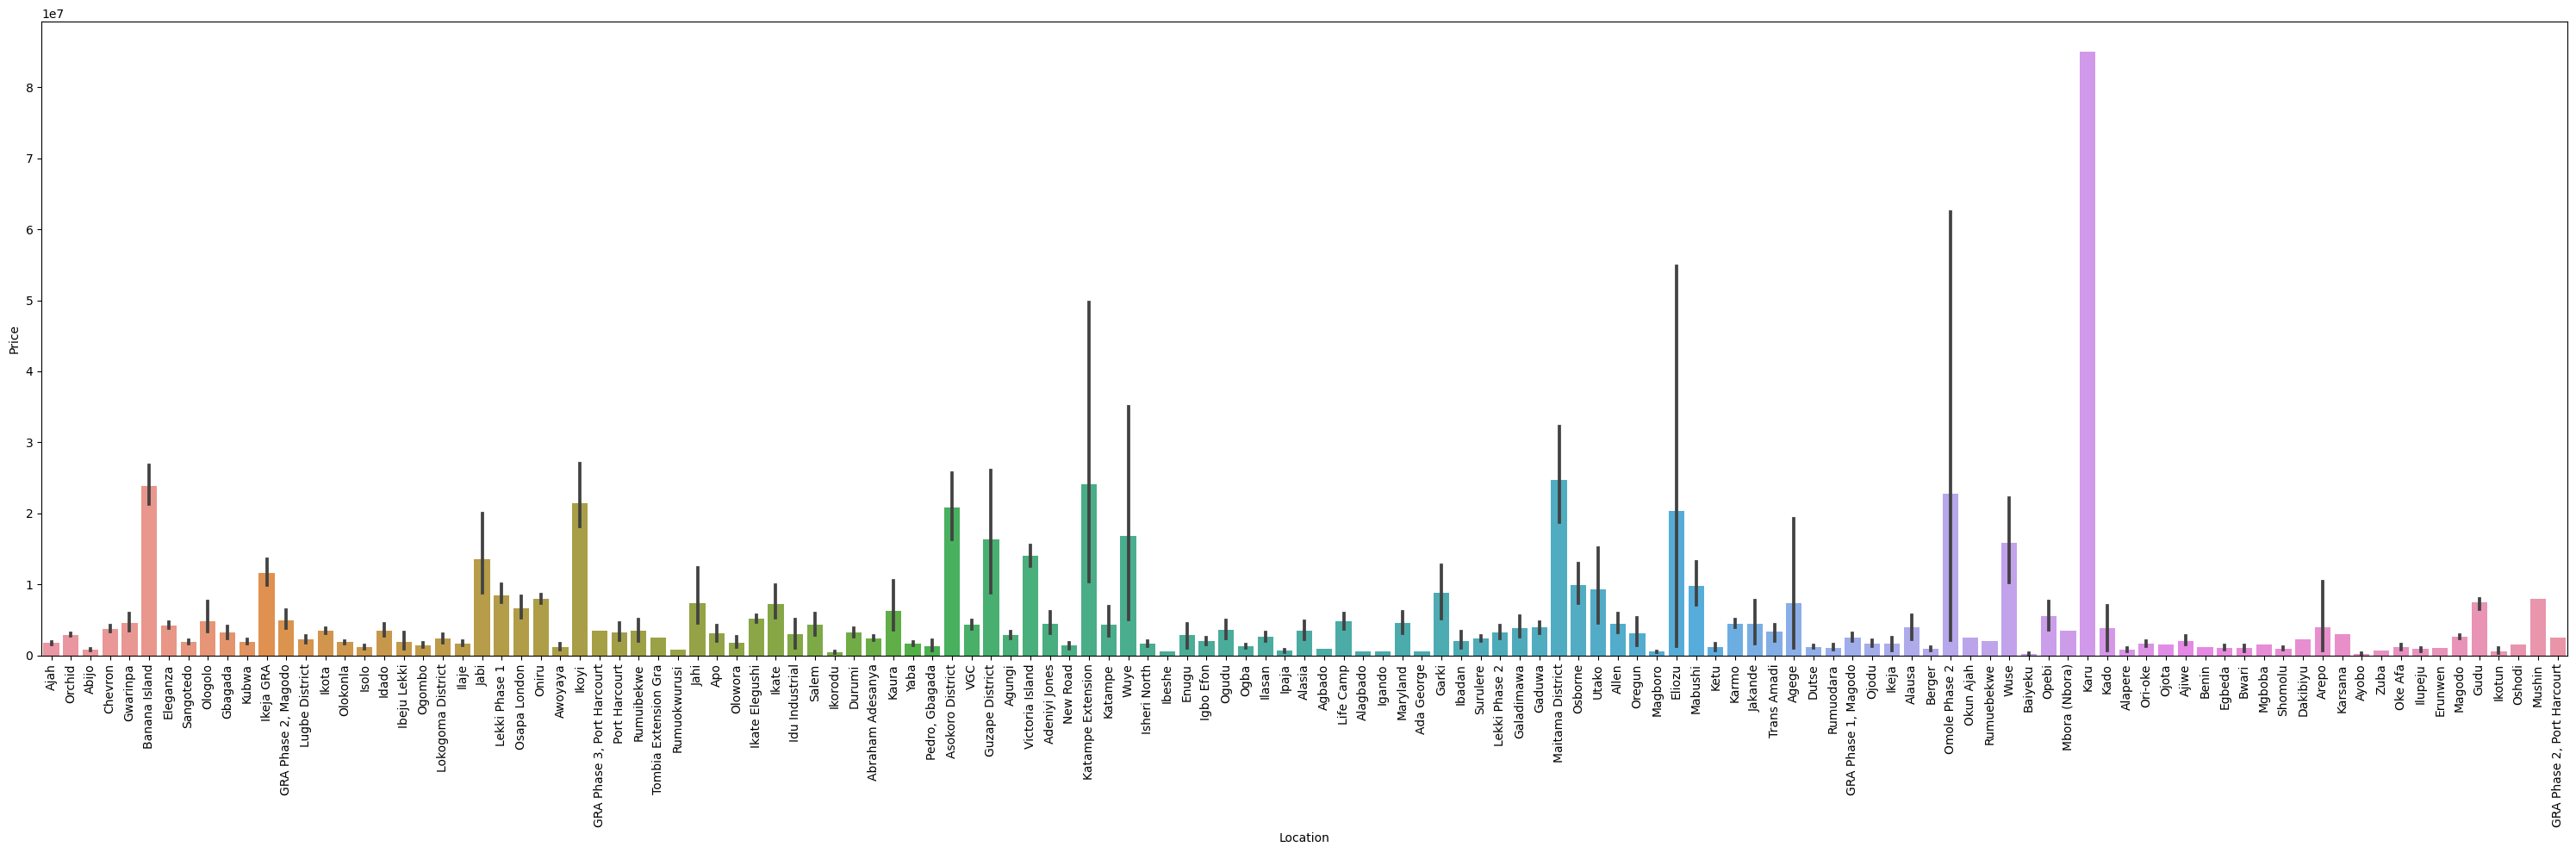

In [1391]:
plt.figure(figsize=(30,10))

sns.barplot(data =df, x=df['Loc'], y= df['Amount'])
plt.xlabel('Location')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [1392]:
df['Period'].unique()

array(['per annum', nan, 'per month'], dtype=object)

In [1393]:
monthly_payments = df[(df['Period'] == 'per month')]
monthly_payments.head(30)

,Date,Description,Location,Currency,Amount,Period,House_type,Bedrooms,Serviced,Loc
492,2023-10-29,1 bedroom mini flat (room and parlour) for rent,"Kofo Abayomi Street, Victoria Island (VI), Lagos",₦,750000.0,per month,Type: Mini Flat (Room and Parlour),Bedrooms: 1,Serviced,Victoria Island
603,2023-10-29,self contain (single rooms) for rent,"Behind Prime Waters Gardens, Off Freedom Way,...",₦,450000.0,per month,Type: Self Contain (Single Rooms),Bathrooms: 1,None,Lekki Phase 1
777,2023-10-29,self contain (single rooms) for rent,"Off Freedom Way, Lekki Phase 1, Lekki, Lagos",₦,650000.0,per month,Type: Self Contain (Single Rooms),Bathrooms: 1,None,Lekki Phase 1
841,2023-10-30,3 bedroom house for rent,"Conservation, Lekki, Lagos",₦,750000.0,per month,Type: House,Bedrooms: 3,Serviced,Orchid
1225,2023-10-29,1 bedroom flat / apartment for rent,"Prime Water Gardens, Lekki, Lagos",₦,350000.0,per month,Type: Flat / Apartment,Bedrooms: 1,Serviced,Ikate
1237,2023-10-29,1 bedroom flat / apartment for rent,"Prime Water Gardens, Lekki, Lagos",₦,400000.0,per month,Type: Flat / Apartment,Bedrooms: 1,Serviced,Ikate
1633,2023-10-25,1 bedroom mini flat (room and parlour) for rent,"Sangotedo, Ajah, Lagos",₦,450000.0,per month,Type: Mini Flat (Room and Parlour),Bedrooms: 1,None,Sangotedo
1669,2023-10-25,self contain (single rooms) for rent,"Jide Agbalaya, Chevy View Estate, Chevron, Le...",₦,230000.0,per month,Type: Self Contain (Single Rooms),Bathrooms: 1,None,Chevron
1670,2023-10-25,self contain (single rooms) for rent,"24 Ugochukwu Orji Street Spg, Ologolo, Lekki,...",₦,250000.0,per month,Type: Self Contain (Single Rooms),Bathrooms: 1,None,Ologolo
1898,2023-10-25,1 bedroom flat / apartment for rent,"Chevron Conservation Estate, Lekki, Lagos",₦,625000.0,per month,Type: Flat / Apartment,Bedrooms: 1,None,Orchid


In [1394]:
per_annum_null = df[df.isna().any(axis=1)]
per_annum_null.head(30)

,Date,Description,Location,Currency,Amount,Period,House_type,Bedrooms,Serviced,Loc
376,2023-10-29,3 bedroom terraced duplex for rent,"Galadimawa Round About, Galadimawa, Abuja",₦,2500000.0,NaN,Type: Terraced Duplex,Bedrooms: 3,None,Galadimawa
1078,2023-10-27,4 bedroom house for rent,"Lekki Phase 1, Lekki, Lagos",₦,8500000.0,NaN,Type: House,Bedrooms: 4,Serviced,Lekki Phase 1
1081,2023-10-27,3 bedroom flat / apartment for rent,"Shonola Street, Aguda Bus Stop, Ogba, Ikeja, ...",₦,1200000.0,NaN,Type: Flat / Apartment,Bedrooms: 3,None,Ogba
1170,2023-10-26,4 bedroom house for rent,"Vgc Lekki Lagos, VGC, Lekki, Lagos",₦,6000000.0,NaN,Type: House,Bedrooms: 4,None,VGC
1632,2023-10-25,4 bedroom terraced duplex for rent,"Ikate, Lekki, Lagos",₦,7000000.0,NaN,Type: Terraced Duplex,Bedrooms: 4,Serviced,Ikate
1756,2023-10-25,2 bedroom flat / apartment for rent,"Sunview Estate Lbs, Ajah, Lagos",₦,2000000.0,NaN,Type: Flat / Apartment,Bedrooms: 2,None,Ajah
1822,2023-10-25,3 bedroom flat / apartment for rent,"3rd Avenue, Banana Island Estate, Ikoyi, Lagos",₦,17000000.0,NaN,Type: Flat / Apartment,Bedrooms: 3,None,Banana Island
2007,2023-10-30,4 bedroom terraced duplex for rent,"Ikota, Lekki, Lagos",₦,4000000.0,NaN,Type: Terraced Duplex,Bedrooms: 4,None,Ikota
2056,2023-10-24,self contain (single rooms) for rent,"Buena Vista Estate, Lekki, Lagos",₦,800000.0,NaN,Type: Self Contain (Single Rooms),Bathrooms: 1,None,Orchid
2070,2023-10-24,3 bedroom terraced duplex for rent,"Orchid Road, Lekki Expressway, Lekki, Lagos",₦,4000000.0,NaN,Type: Terraced Duplex,Bedrooms: 3,None,Orchid


In [1395]:
df['Period'].fillna('per annum', inplace=True)

In [1396]:
for index, row in df.iterrows():
    if 'per month' in row['Period']:
        change_to_per_annum = row['Amount'] * 12
        df.loc[index, 'Amount'] = change_to_per_annum

In [1397]:
monthly_payments = df[(df['Period'] == 'per month')]
monthly_payments.head(30)

,Date,Description,Location,Currency,Amount,Period,House_type,Bedrooms,Serviced,Loc
492,2023-10-29,1 bedroom mini flat (room and parlour) for rent,"Kofo Abayomi Street, Victoria Island (VI), Lagos",₦,9000000.0,per month,Type: Mini Flat (Room and Parlour),Bedrooms: 1,Serviced,Victoria Island
603,2023-10-29,self contain (single rooms) for rent,"Behind Prime Waters Gardens, Off Freedom Way,...",₦,5400000.0,per month,Type: Self Contain (Single Rooms),Bathrooms: 1,None,Lekki Phase 1
777,2023-10-29,self contain (single rooms) for rent,"Off Freedom Way, Lekki Phase 1, Lekki, Lagos",₦,7800000.0,per month,Type: Self Contain (Single Rooms),Bathrooms: 1,None,Lekki Phase 1
841,2023-10-30,3 bedroom house for rent,"Conservation, Lekki, Lagos",₦,9000000.0,per month,Type: House,Bedrooms: 3,Serviced,Orchid
1225,2023-10-29,1 bedroom flat / apartment for rent,"Prime Water Gardens, Lekki, Lagos",₦,4200000.0,per month,Type: Flat / Apartment,Bedrooms: 1,Serviced,Ikate
1237,2023-10-29,1 bedroom flat / apartment for rent,"Prime Water Gardens, Lekki, Lagos",₦,4800000.0,per month,Type: Flat / Apartment,Bedrooms: 1,Serviced,Ikate
1633,2023-10-25,1 bedroom mini flat (room and parlour) for rent,"Sangotedo, Ajah, Lagos",₦,5400000.0,per month,Type: Mini Flat (Room and Parlour),Bedrooms: 1,None,Sangotedo
1669,2023-10-25,self contain (single rooms) for rent,"Jide Agbalaya, Chevy View Estate, Chevron, Le...",₦,2760000.0,per month,Type: Self Contain (Single Rooms),Bathrooms: 1,None,Chevron
1670,2023-10-25,self contain (single rooms) for rent,"24 Ugochukwu Orji Street Spg, Ologolo, Lekki,...",₦,3000000.0,per month,Type: Self Contain (Single Rooms),Bathrooms: 1,None,Ologolo
1898,2023-10-25,1 bedroom flat / apartment for rent,"Chevron Conservation Estate, Lekki, Lagos",₦,7500000.0,per month,Type: Flat / Apartment,Bedrooms: 1,None,Orchid


In [1398]:
# clean house type 
df['House_type'].unique()

array(['Type: Terraced Duplex', 'Type: Self Contain (Single Rooms)',
       'Type: Mini Flat (Room and Parlour)', 'Type: Semi-detached Duplex',
       'Type: Detached Bungalow', 'Type: Flat / Apartment',
       'Type: Detached Duplex', 'Type: House', 'Type: Terraced Bungalow',
       'Type: Semi-detached Bungalow', 'Type: Block of Flats'],
      dtype=object)

In [1399]:
for index, row in df.iterrows():
    split_house_type = row['House_type'].split(':')[1].strip()
    df.loc[index, 'House_type'] = split_house_type

In [1400]:
df.head()

,Date,Description,Location,Currency,Amount,Period,House_type,Bedrooms,Serviced,Loc
1,2023-10-30,4 bedroom terraced duplex for rent,"Ajah, Lagos",₦,3500000.0,per annum,Terraced Duplex,Bedrooms: 4,None,Ajah
2,2023-10-30,self contain (single rooms) for rent,"Off Chevron Toll Gate, Orchid Road, Lekki, Lagos",₦,950000.0,per annum,Self Contain (Single Rooms),Bathrooms: 1,Serviced,Orchid
3,2023-10-30,1 bedroom mini flat (room and parlour) for rent,"Royal Homes Back Of Catholic Church Gra, Abij...",₦,800000.0,per annum,Mini Flat (Room and Parlour),Bedrooms: 1,None,Abijo
4,2023-10-30,self contain (single rooms) for rent,"Chevy Veiw Estate Along Chevron Drive Lagos, ...",₦,1500000.0,per annum,Self Contain (Single Rooms),Bathrooms: 1,Serviced,Chevron
5,2023-10-30,2 bedroom semi-detached duplex for rent,"Off Chevron Toll Gate, Orchid Road, Lekki, Lagos",₦,3500000.0,per annum,Semi-detached Duplex,Bedrooms: 2,Serviced,Orchid


In [1401]:
df['House_type'].unique()

array(['Terraced Duplex', 'Self Contain (Single Rooms)',
       'Mini Flat (Room and Parlour)', 'Semi-detached Duplex',
       'Detached Bungalow', 'Flat / Apartment', 'Detached Duplex',
       'House', 'Terraced Bungalow', 'Semi-detached Bungalow',
       'Block of Flats'], dtype=object)

In [1402]:
for index, row in df.iterrows():
    if 'Self Contain' in row['House_type']:
        df.loc[index, 'House_type'] = 'Self Contain'

In [1403]:
for index, row in df.iterrows():
    if 'Mini Flat' in row['House_type']:
        df.loc[index, 'House_type'] = 'Mini Flat'

In [1404]:
for index, row in df.iterrows():
    if 'Flat / Apartment' in row['House_type']:
        split_flat = row['House_type'].split('/')[1].strip()
        df.loc[index, 'House_type'] = split_flat

In [1405]:
for index, row in df.iterrows():
    if 'Block of Flats' in row['House_type']:
        df.drop(index, inplace=True)

In [1406]:
df.head(20)

,Date,Description,Location,Currency,Amount,Period,House_type,Bedrooms,Serviced,Loc
1,2023-10-30,4 bedroom terraced duplex for rent,"Ajah, Lagos",₦,3500000.0,per annum,Terraced Duplex,Bedrooms: 4,None,Ajah
2,2023-10-30,self contain (single rooms) for rent,"Off Chevron Toll Gate, Orchid Road, Lekki, Lagos",₦,950000.0,per annum,Self Contain,Bathrooms: 1,Serviced,Orchid
3,2023-10-30,1 bedroom mini flat (room and parlour) for rent,"Royal Homes Back Of Catholic Church Gra, Abij...",₦,800000.0,per annum,Mini Flat,Bedrooms: 1,None,Abijo
4,2023-10-30,self contain (single rooms) for rent,"Chevy Veiw Estate Along Chevron Drive Lagos, ...",₦,1500000.0,per annum,Self Contain,Bathrooms: 1,Serviced,Chevron
5,2023-10-30,2 bedroom semi-detached duplex for rent,"Off Chevron Toll Gate, Orchid Road, Lekki, Lagos",₦,3500000.0,per annum,Semi-detached Duplex,Bedrooms: 2,Serviced,Orchid
6,2023-10-30,3 bedroom detached bungalow for rent,"Directly On 3rd Avenue, Gwarinpa, Abuja",₦,15000000.0,per annum,Detached Bungalow,Bedrooms: 3,None,Gwarinpa
8,2023-10-30,3 bedroom flat / apartment for rent,"Banana Island, Ikoyi, Lagos",₦,25000000.0,per annum,Apartment,Bedrooms: 3,Serviced,Banana Island
9,2023-10-30,4 bedroom semi-detached duplex for rent,"Oral Estate, Lekki, Lagos",₦,4500000.0,per annum,Semi-detached Duplex,Bedrooms: 4,None,Eleganza
10,2023-10-30,3 bedroom flat / apartment for rent,"Before Blenco, Sangotedo, Ajah, Lagos",₦,2000000.0,per annum,Apartment,Bedrooms: 3,None,Sangotedo
11,2023-10-30,5 bedroom detached duplex for rent,"Ologolo, Lekki, Lagos",₦,5000000.0,per annum,Detached Duplex,Bedrooms: 5,None,Ologolo


In [1407]:
# clean bedroom 
df['Bedrooms'].unique()

array(['Bedrooms: 4', 'Bathrooms: 1', 'Bedrooms: 1', 'Bedrooms: 2',
       'Bedrooms: 3', 'Bedrooms: 5', '   ', 'Servicing: Serviced',
       'Bathrooms: 2', 'Bedrooms: 7', 'Bedrooms: 6', 'Bathrooms: 3',
       'Toilets: 11', 'Bedrooms: 8', 'Bedrooms: 9', 'Toilets: 1',
       'Bathrooms: 4', 'Bedrooms: 10', 'Bedrooms: 14', 'Bedrooms: 20',
       'Toilets: 2', 'Furnishing: Furnished', 'Bedrooms: 12',
       'Toilets: 4', 'Bedrooms: 18', 'Bedrooms: 39'], dtype=object)

In [1408]:
for index, row in df.iterrows():
    if ('Bathrooms' in row['Bedrooms'] or 'Toilets' in row['Bedrooms']) and 'Self Contain' in row['House_type']:
        df.loc[index, 'Bedrooms'] = '0'

In [1409]:
df['Bedrooms'].unique()

array(['Bedrooms: 4', '0', 'Bedrooms: 1', 'Bedrooms: 2', 'Bedrooms: 3',
       'Bedrooms: 5', '   ', 'Servicing: Serviced', 'Bedrooms: 7',
       'Bedrooms: 6', 'Bedrooms: 8', 'Bedrooms: 9', 'Bathrooms: 1',
       'Bedrooms: 10', 'Bedrooms: 14', 'Bedrooms: 20',
       'Furnishing: Furnished', 'Bedrooms: 12', 'Bedrooms: 18',
       'Bedrooms: 39'], dtype=object)

In [1410]:
# from further investigation this is a shared apartment
# so input the bedroom as one
# since it has a sitting room

for index, row in df.iterrows():
    if 'Bathrooms' in row['Bedrooms'] and 'Apartment' in row['House_type']:
        df.loc[index, 'Bedrooms'] = '1'

In [1411]:
df['Bedrooms'].unique()

array(['Bedrooms: 4', '0', 'Bedrooms: 1', 'Bedrooms: 2', 'Bedrooms: 3',
       'Bedrooms: 5', '   ', 'Servicing: Serviced', 'Bedrooms: 7',
       'Bedrooms: 6', 'Bedrooms: 8', 'Bedrooms: 9', '1', 'Bedrooms: 10',
       'Bedrooms: 14', 'Bedrooms: 20', 'Furnishing: Furnished',
       'Bedrooms: 12', 'Bedrooms: 18', 'Bedrooms: 39'], dtype=object)

In [1412]:
# from further investigation
#  these are all single rooms
#  that is self contain

for index, row in df.iterrows():
    if ('Serviced' in row['Bedrooms'] or 'Furnished' in row['Bedrooms'] or '   ' == row['Bedrooms']) and 'Self Contain' in row['House_type']:
        df.loc[index, 'Bedrooms'] = '0'

In [1413]:
df['Bedrooms'].unique()

array(['Bedrooms: 4', '0', 'Bedrooms: 1', 'Bedrooms: 2', 'Bedrooms: 3',
       'Bedrooms: 5', 'Bedrooms: 7', 'Bedrooms: 6', 'Bedrooms: 8',
       'Bedrooms: 9', '1', 'Bedrooms: 10', 'Bedrooms: 14', 'Bedrooms: 20',
       'Bedrooms: 12', 'Bedrooms: 18', 'Bedrooms: 39'], dtype=object)

In [1414]:
for index, row in df.iterrows():
    if 'Bedrooms' in row['Bedrooms'] :
        split_bedrooms = row['Bedrooms'].split(':')[1].strip()
        df.loc[index, 'Bedrooms'] = split_bedrooms

In [1415]:
df['Bedrooms'] = df['Bedrooms'].astype(int)
df['Bedrooms'].dtype

dtype('int64')

In [1416]:
# bedrooms with more than 10 bedrooms
# do not have enough data represented. 

for index, row in df.iterrows():
    if row['Bedrooms'] > 10:
        df.drop(index, inplace=True)

In [1417]:
df.shape

(4403, 10)

In [1418]:
df['Bedrooms'].value_counts()

3     1128
4     1060
2      948
1      633
0      360
5      233
6       26
7        6
8        4
10       4
9        1
Name: Bedrooms, dtype: int64

In [1419]:
df.head()

,Date,Description,Location,Currency,Amount,Period,House_type,Bedrooms,Serviced,Loc
1,2023-10-30,4 bedroom terraced duplex for rent,"Ajah, Lagos",₦,3500000.0,per annum,Terraced Duplex,4,None,Ajah
2,2023-10-30,self contain (single rooms) for rent,"Off Chevron Toll Gate, Orchid Road, Lekki, Lagos",₦,950000.0,per annum,Self Contain,0,Serviced,Orchid
3,2023-10-30,1 bedroom mini flat (room and parlour) for rent,"Royal Homes Back Of Catholic Church Gra, Abij...",₦,800000.0,per annum,Mini Flat,1,None,Abijo
4,2023-10-30,self contain (single rooms) for rent,"Chevy Veiw Estate Along Chevron Drive Lagos, ...",₦,1500000.0,per annum,Self Contain,0,Serviced,Chevron
5,2023-10-30,2 bedroom semi-detached duplex for rent,"Off Chevron Toll Gate, Orchid Road, Lekki, Lagos",₦,3500000.0,per annum,Semi-detached Duplex,2,Serviced,Orchid


In [1420]:
df['Serviced'].unique()

array(['None', 'Serviced'], dtype=object)

In [1424]:
def service(x):
    if 'Serviced' in x:
        return 1
    else:
        return 0
    
df['Serviced'] = df['Serviced'].apply(service)

In [1423]:
df.head()

,Date,Description,Location,Currency,Amount,Period,House_type,Bedrooms,Serviced,Loc
1,2023-10-30,4 bedroom terraced duplex for rent,"Ajah, Lagos",₦,3500000.0,per annum,Terraced Duplex,4,None,Ajah
2,2023-10-30,self contain (single rooms) for rent,"Off Chevron Toll Gate, Orchid Road, Lekki, Lagos",₦,950000.0,per annum,Self Contain,0,Serviced,Orchid
3,2023-10-30,1 bedroom mini flat (room and parlour) for rent,"Royal Homes Back Of Catholic Church Gra, Abij...",₦,800000.0,per annum,Mini Flat,1,None,Abijo
4,2023-10-30,self contain (single rooms) for rent,"Chevy Veiw Estate Along Chevron Drive Lagos, ...",₦,1500000.0,per annum,Self Contain,0,Serviced,Chevron
5,2023-10-30,2 bedroom semi-detached duplex for rent,"Off Chevron Toll Gate, Orchid Road, Lekki, Lagos",₦,3500000.0,per annum,Semi-detached Duplex,2,Serviced,Orchid


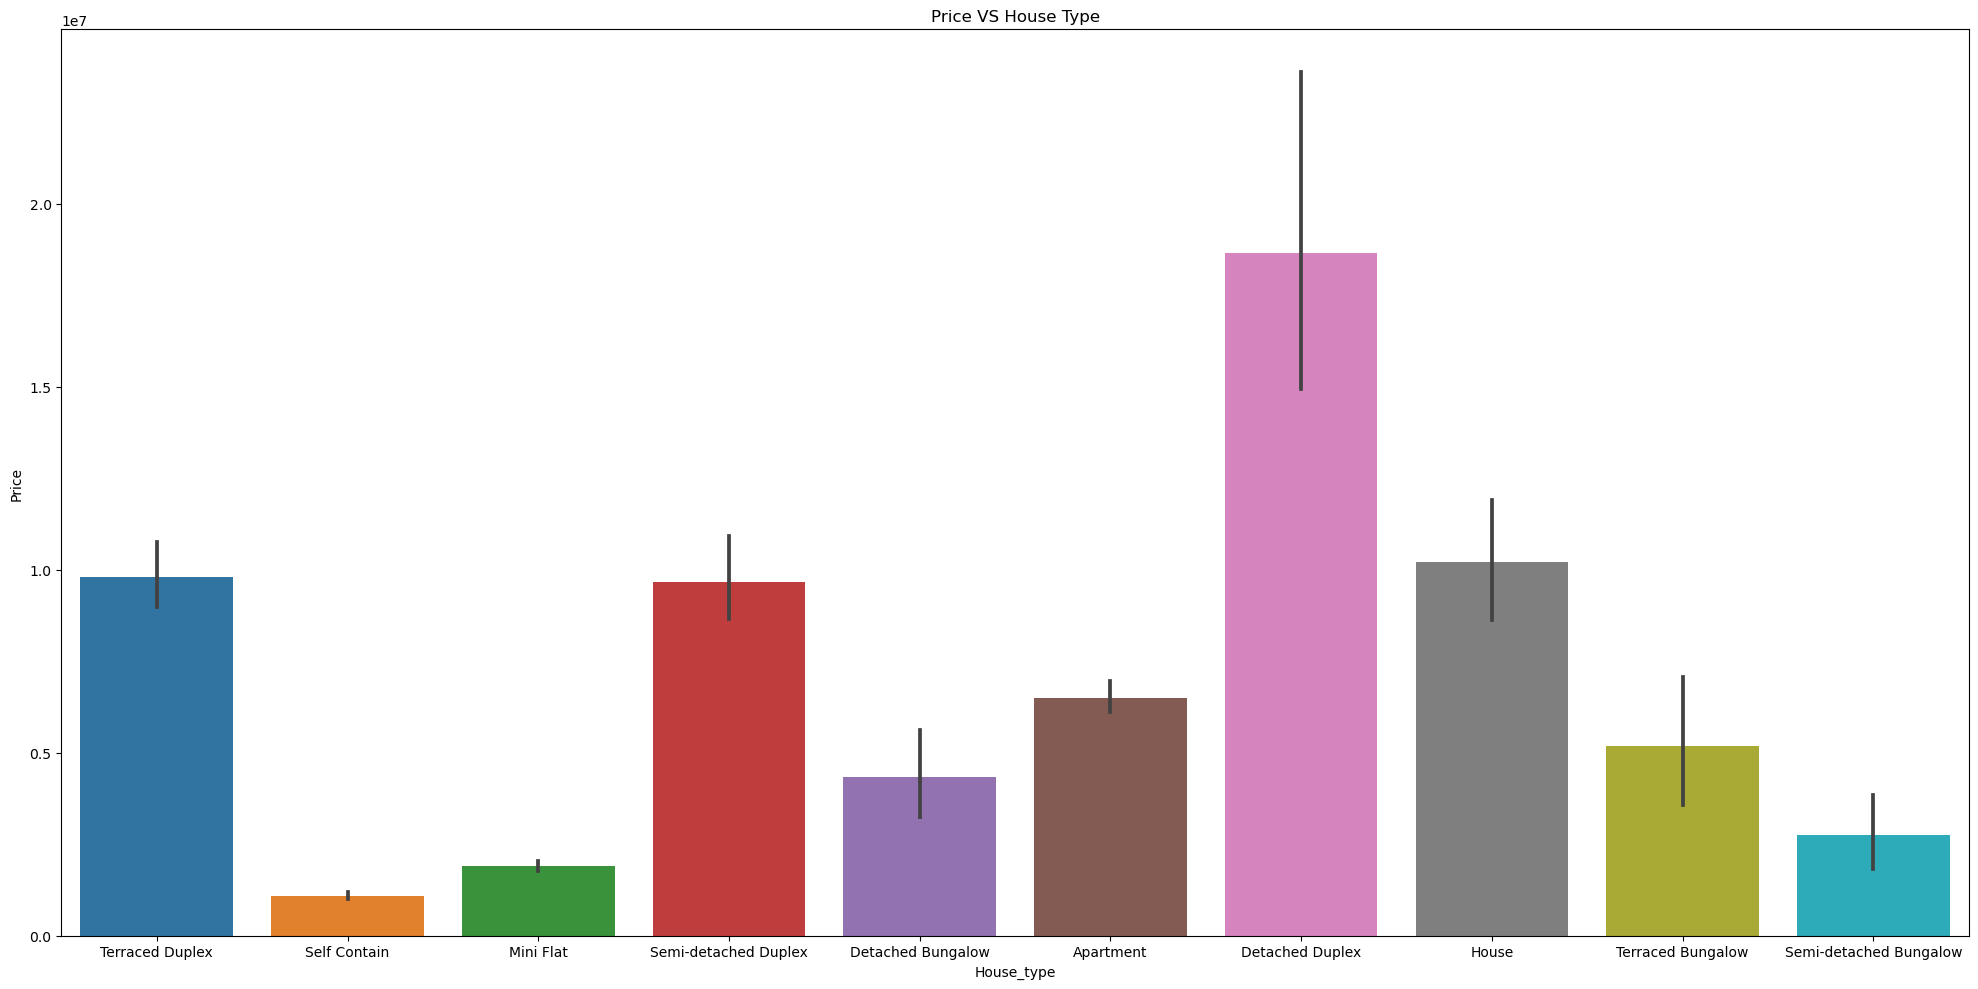

In [1426]:
plt.figure(figsize=(20, 10))

sns.barplot(data=df, x=df['House_type'], y=df['Amount'])
plt.xlabel('House_type')
plt.ylabel('Price')
plt.title('Price VS House Type')
plt.tight_layout()
plt.show()

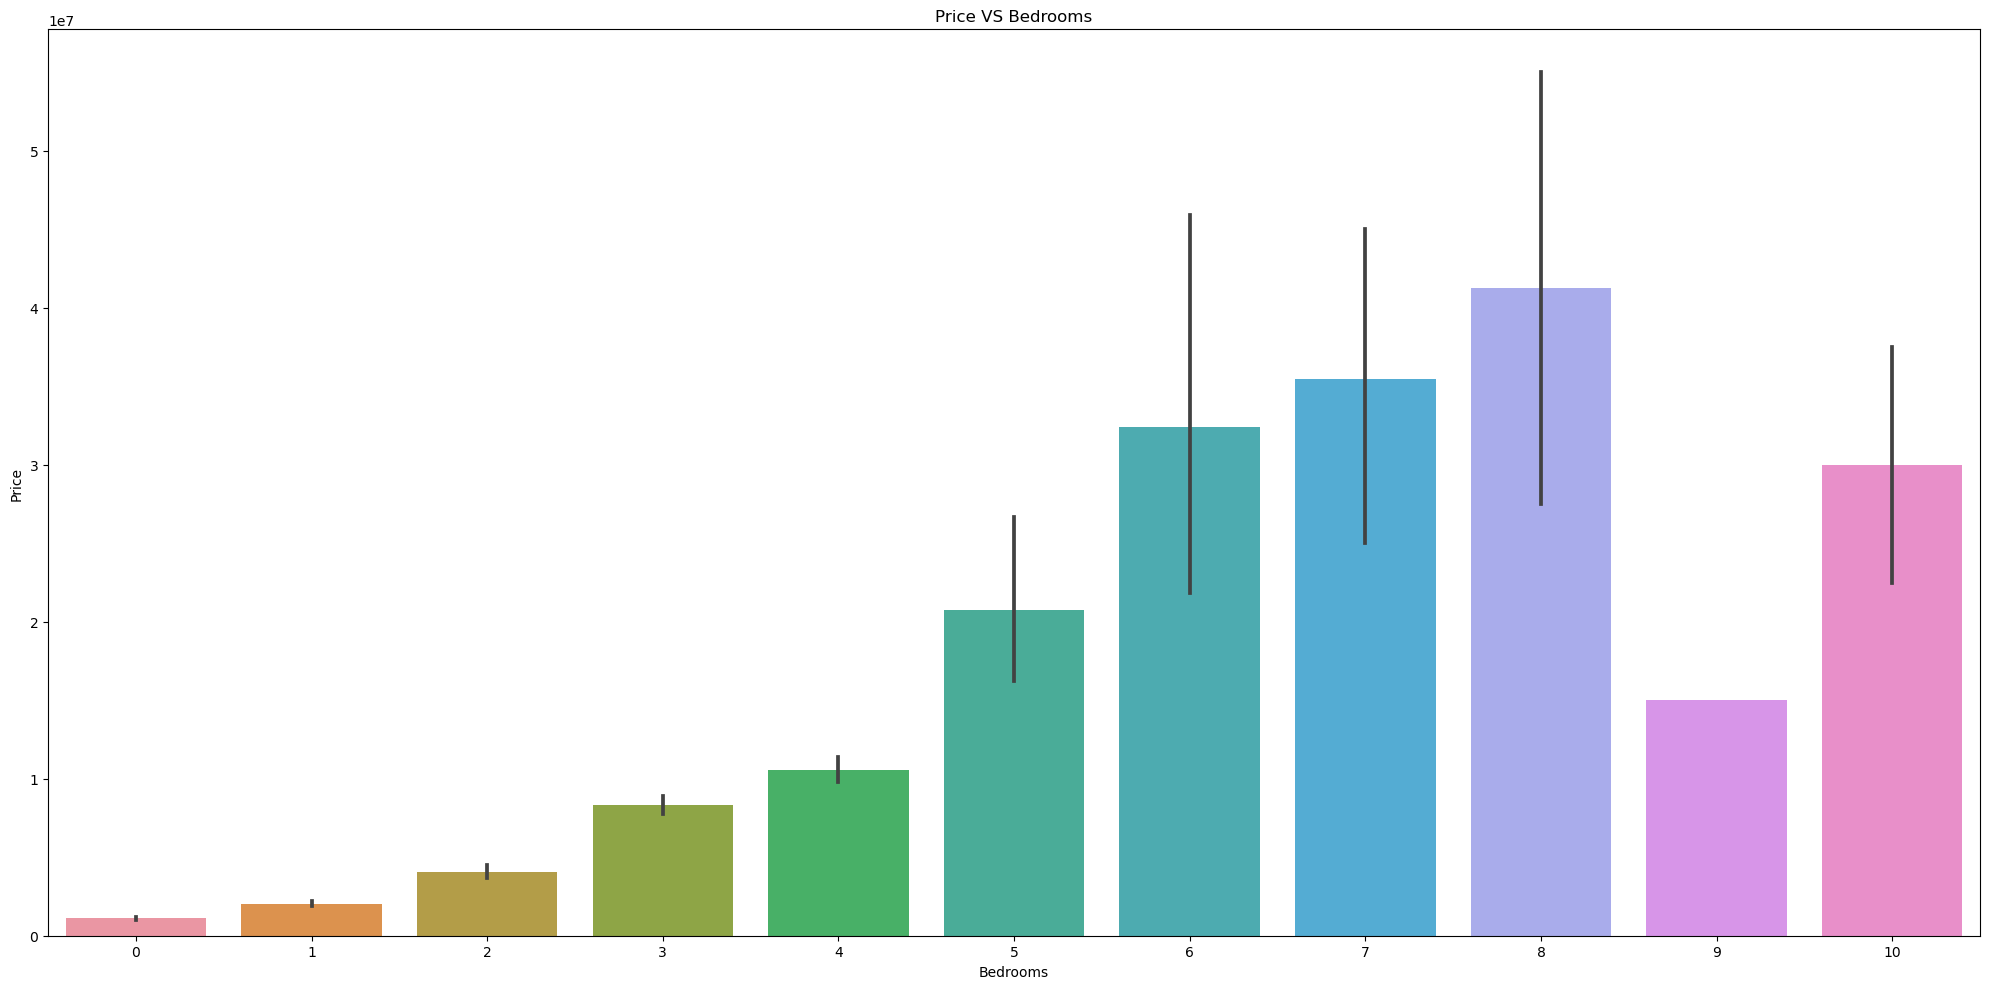

In [1429]:
plt.figure(figsize=(20, 10))

sns.barplot(data=df, x=df['Bedrooms'], y=df['Amount'])
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Price VS Bedrooms')
plt.tight_layout()
plt.show()

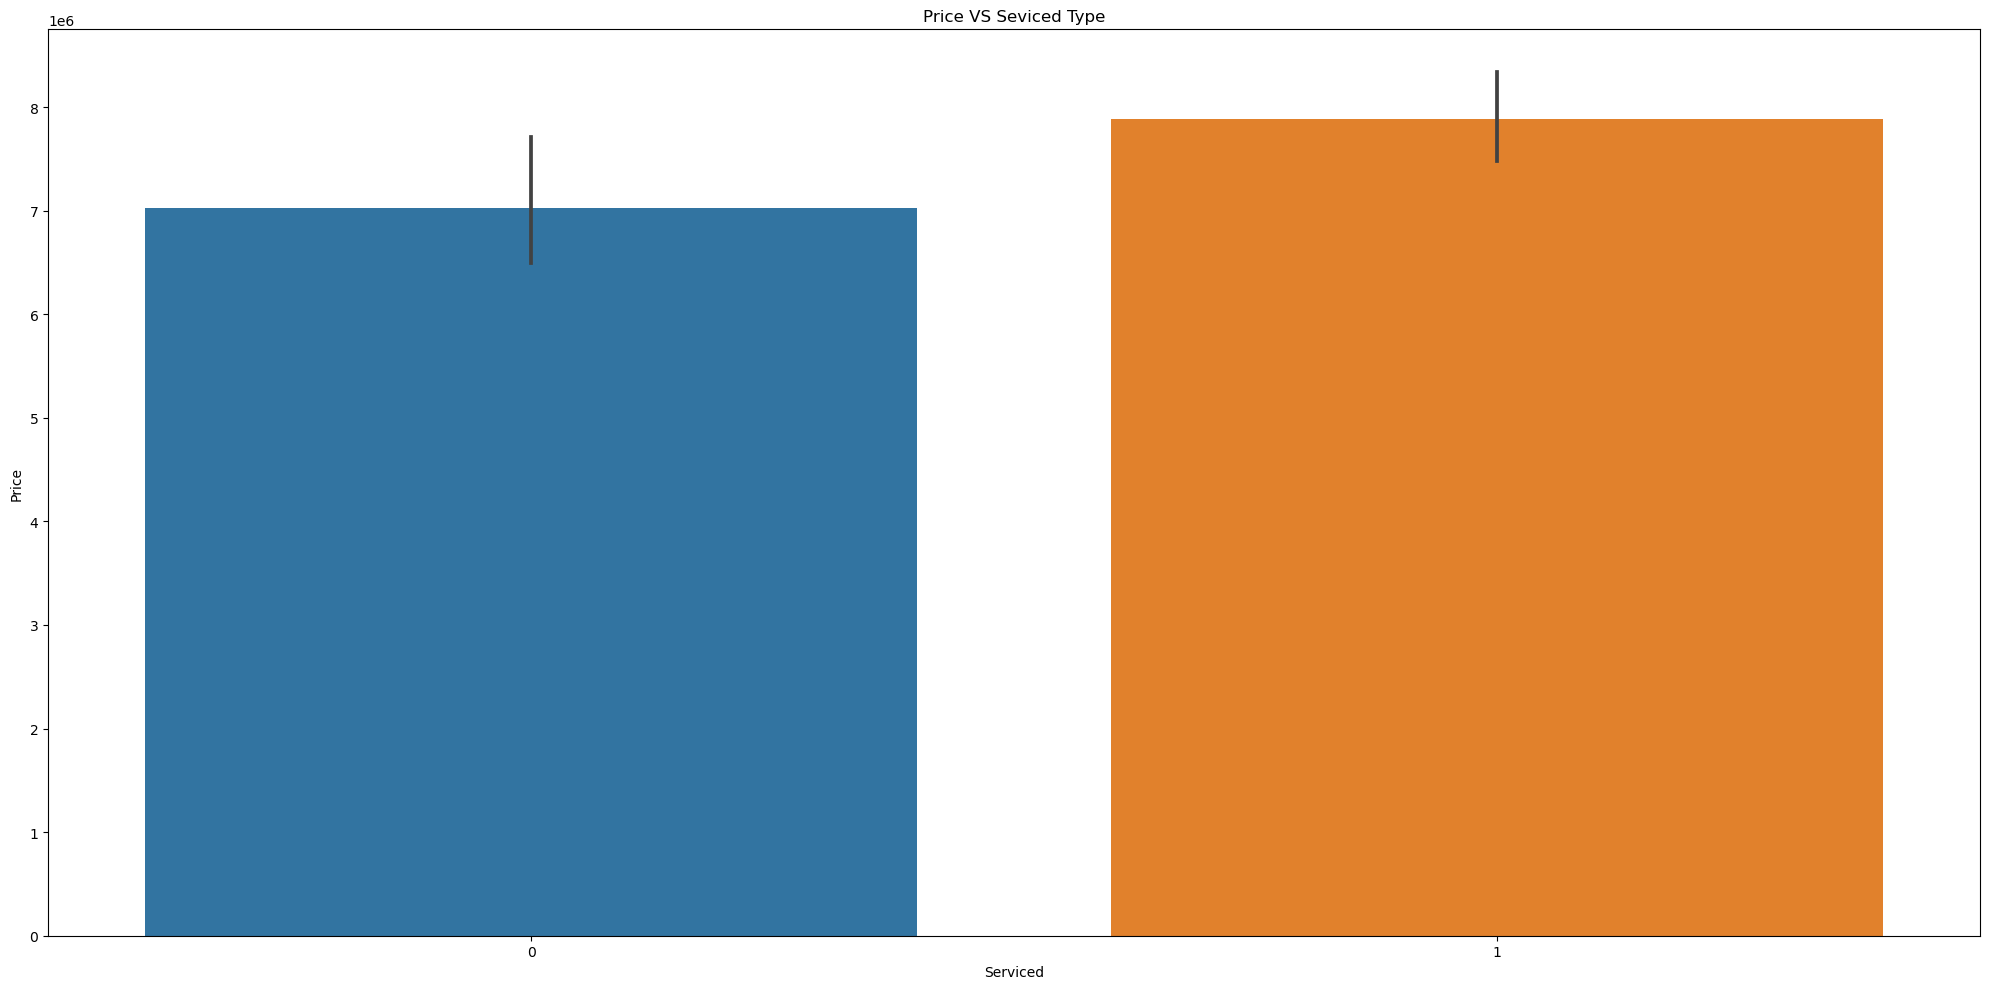

In [1428]:
plt.figure(figsize=(20, 10))

sns.barplot(data=df, x=df['Serviced'], y=df['Amount'])
plt.xlabel('Serviced')
plt.ylabel('Price')
plt.title('Price VS Seviced Type')
plt.tight_layout()
plt.show()

In [1430]:
df.head()

,Date,Description,Location,Currency,Amount,Period,House_type,Bedrooms,Serviced,Loc
1,2023-10-30,4 bedroom terraced duplex for rent,"Ajah, Lagos",₦,3500000.0,per annum,Terraced Duplex,4,0,Ajah
2,2023-10-30,self contain (single rooms) for rent,"Off Chevron Toll Gate, Orchid Road, Lekki, Lagos",₦,950000.0,per annum,Self Contain,0,1,Orchid
3,2023-10-30,1 bedroom mini flat (room and parlour) for rent,"Royal Homes Back Of Catholic Church Gra, Abij...",₦,800000.0,per annum,Mini Flat,1,0,Abijo
4,2023-10-30,self contain (single rooms) for rent,"Chevy Veiw Estate Along Chevron Drive Lagos, ...",₦,1500000.0,per annum,Self Contain,0,1,Chevron
5,2023-10-30,2 bedroom semi-detached duplex for rent,"Off Chevron Toll Gate, Orchid Road, Lekki, Lagos",₦,3500000.0,per annum,Semi-detached Duplex,2,1,Orchid


## Data Modeling

In [1434]:
# drop unnecessary columns
df.drop(columns=['Currency', 'Period', 'Description', 'Location'], inplace=True)

In [1435]:
df.rename(columns={'Loc': 'Location'}, inplace=True)

In [1436]:
df.head()

,Date,Amount,House_type,Bedrooms,Serviced,Location
1,2023-10-30,3500000.0,Terraced Duplex,4,0,Ajah
2,2023-10-30,950000.0,Self Contain,0,1,Orchid
3,2023-10-30,800000.0,Mini Flat,1,0,Abijo
4,2023-10-30,1500000.0,Self Contain,0,1,Chevron
5,2023-10-30,3500000.0,Semi-detached Duplex,2,1,Orchid


In [1437]:
from sklearn.preprocessing import LabelEncoder

le_house = LabelEncoder()
df['House_type'] = le_house.fit_transform(df['House_type'])

In [1438]:
le_location = LabelEncoder()
df['Location'] = le_location.fit_transform(df['Location'])

In [1439]:
df['ts'] = df['Date'].values.astype(np.int64) // 10 ** 9

In [1440]:
df.head()

,Date,Amount,House_type,Bedrooms,Serviced,Location,ts
1,2023-10-30,3500000.0,9,4,0,7,1698624000
2,2023-10-30,950000.0,5,0,1,104,1698624000
3,2023-10-30,800000.0,4,1,0,0,1698624000
4,2023-10-30,1500000.0,5,0,1,24,1698624000
5,2023-10-30,3500000.0,7,2,1,104,1698624000


In [1442]:
# drop date column
df.drop(columns=['Date'], inplace=True)

In [1443]:
df.corr()

,Amount,House_type,Bedrooms,Serviced,Location,ts
Amount,1.000000,0.036320,0.345943,0.029474,-0.019291,0.003720
House_type,0.036320,1.000000,0.188812,-0.009383,-0.022659,-0.052814
Bedrooms,0.345943,0.188812,1.000000,-0.043440,-0.011476,-0.047276
Serviced,0.029474,-0.009383,-0.043440,1.000000,0.052704,-0.056869
Location,-0.019291,-0.022659,-0.011476,0.052704,1.000000,-0.007218
ts,0.003720,-0.052814,-0.047276,-0.056869,-0.007218,1.000000


In [1456]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X= df.drop("Amount", axis=1).values
y = df["Amount"].values

scaler = StandardScaler()


X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [1460]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

model= RandomForestRegressor()
grid = {'n_estimators': range(100, 500),
        'max_depth': [2,5, 8],
        'max_features': ['sqrt', 'log2'],
        'random_state': [42]}

random = RandomizedSearchCV(model,grid, cv=2)
random.fit(X_train_scaled, y_train)
print(random.best_params_, random.best_score_)

{'random_state': 42, 'n_estimators': 187, 'max_features': 'log2', 'max_depth': 5} 0.09263377673514417


In [1461]:


random_test = RandomForestRegressor(n_estimators=187, max_features='log2', max_depth=5, random_state=42)
random_test.fit(X_train_scaled, y_train)
y_pred_ran =random_test.predict(X_test_scaled)
mse= mean_squared_error(y_test,y_pred_ran, squared=True)
rmse = mean_squared_error(y_test, y_pred_ran, squared=False)
print(mse)
print(rmse)

175222449197946.9
13237161.674541371


In [1462]:
from sklearn.metrics import r2_score

accuracy = r2_score(y_test, y_pred_ran)
print(accuracy)

0.17339558397928057
